In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
papers = pd.read_csv('./data_test/vnexpress-thoisu-ner1.csv')
# convert type of column
papers.rename(columns={'doc_ner': 'paper_text'}, inplace=True)
papers['paper_text'].astype(str)
# Print head
# print(papers.head())
# print(papers.shape)
print(papers['paper_text'][0])
print(papers['location'][0])
print(papers['person'][0])
print(papers['organization'][0])

Mỏ cát được giao nằm trên sông Tiền thuộc xã An Nhơn, huyện_châu_thành. Đơn vị tiếp nhận là Tổng Công ty xây dựng số 1 - CTCP - nhà thầu thi công dự án thành phần đoạn Cần Thơ - Hậu Giang và Hậu Giang - Cà Mau, thuộc dự án cao_tốc_bắc_nam_phía_đông. Đồng Tháp được giao cung ứng 10,3 triệu m3 trong năm nay và 2024 cho dự án cao_tốc_cần_thơ_cà_mau, trên tổng số 18,1 triệu m3 công trình này cần. Số cát còn lại Chính phủ giao An Giang và vĩnh_long chịu trách nhiệm cung ứng, song hai địa phương này chưa bàn giao. cao_tốc_cần_thơ_cà_mau dài 110 km, các tuyến nối khoảng 25 km, rộng 17 m, 4 làn, tổng vốn đầu tư hơn 27.200 tỷ đồng khởi công tháng 1/2023. Công trình được xem là tuyến quan trọng nhất đồng_bằng_sông_cửu_long khi kết nối nhiều tỉnh thành với 128 cây cầu. ngọc_tài
['huyện Châu Thành', 'cao tốc Bắc Nam phía Đông', 'cao tốc Cần Thơ Cà Mau', 'Vĩnh Long', 'Cao tốc Cần Thơ Cà Mau', 'Đồng bằng sông Cửu Long']
['Ngọc Tài']
[]


In [2]:
import numpy as np
# duplicated
print(papers.duplicated().sum())
papers.drop_duplicates(inplace=True)

# drop nan
papers.dropna(axis=0, inplace=True, how="any")
# drop inf
papers.replace([np.inf, -np.inf], np.nan, inplace=True)
papers.replace('', np.nan, inplace=True)
papers.dropna(inplace=True,how='any',axis=0)
# Remove the columns
try:
    papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
except:
    pass

# Print out the first rows of papers
print(papers.head())
print(papers.info())
papers.reset_index(inplace=True, drop=True)

0
                                               title  \
0  Cao tốc Cần Thơ - Cà Mau có thêm nửa triệu m3 ...   
1  Thủ tướng trao Huân chương Hữu nghị cho bà Aur...   
2  Phà chở 15.000 lượt người mỗi ngày ở miền Tây ...   
3  Giám đốc Công an Hà Nội: Loại nhà nào cũng phả...   
4          Hàng loạt cây rừng bị đầu độc - VnExpress   

                                                body  \
0  Đây là tỉnh đầu tiên bàn giao mỏ cát cho nhà t...   
1  Lãnh đạo Chính phủ Việt Nam trao huân chương c...   
2  Công văn yêu cầu chấm dứt hoạt động bến phà An...   
3  Chiều 20/9, tại cuộc tiếp xúc cử tri quận Tây ...   
4  Ban quản lý rừng phòng hộ đầu nguồn liên hồ Sô...   

                                  date  \
0   Thứ tư, 20/9/2023, 18:49 (GMT+7)\n   
1  Thứ năm, 21/9/2023, 01:29 (GMT+7)\n   
2  Thứ năm, 21/9/2023, 00:00 (GMT+7)\n   
3   Thứ tư, 20/9/2023, 22:11 (GMT+7)\n   
4   Thứ tư, 20/9/2023, 19:04 (GMT+7)\n   

                                            location  \
0  ['huyện Châu

In [3]:
# get timestamps
timestamps = papers.date.to_list()

In [4]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# replace \n
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: re.sub('\n', ' ', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'][0]

'mỏ cát được giao nằm trên sông tiền thuộc xã an nhơn huyện_châu_thành đơn vị tiếp nhận là tổng công ty xây dựng số 1 - ctcp - nhà thầu thi công dự án thành phần đoạn cần thơ - hậu giang và hậu giang - cà mau thuộc dự án cao_tốc_bắc_nam_phía_đông đồng tháp được giao cung ứng 103 triệu m3 trong năm nay và 2024 cho dự án cao_tốc_cần_thơ_cà_mau trên tổng số 181 triệu m3 công trình này cần số cát còn lại chính phủ giao an giang và vĩnh_long chịu trách nhiệm cung ứng song hai địa phương này chưa bàn giao cao_tốc_cần_thơ_cà_mau dài 110 km các tuyến nối khoảng 25 km rộng 17 m 4 làn tổng vốn đầu tư hơn 27200 tỷ đồng khởi công tháng 1/2023 công trình được xem là tuyến quan trọng nhất đồng_bằng_sông_cửu_long khi kết nối nhiều tỉnh thành với 128 cây cầu ngọc_tài'

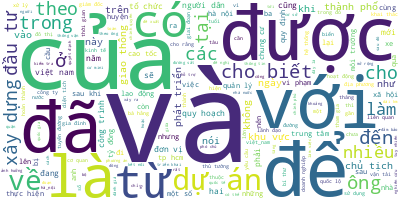

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [6]:

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
import string
import re
import pyvi
from pyvi import ViTokenizer, ViPosTagger
from underthesea import word_tokenize
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words = set(open("./data_test/vietnamese-stopwords-dash.txt", "r", encoding="utf-8").read().splitlines())

def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

def remove_number(text):
    return re.sub(r'\d+', '', text).strip()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_punctuation_not_underscore(text): # remove dấu câu để lại dấu _
    # Tạo một bản sao của string.punctuation và loại bỏ dấu _
    punctuation = string.punctuation.replace("_", "")
    # punctuation = punctuation.replace("-", "")
    return text.translate(str.maketrans('', '', punctuation))

def remove_(text):
    text = remove_punctuation_not_underscore(text)
    text = remove_number(text)
    text = re.sub(r'[\x00-\x1F\x7F-\x9F]', '', text)
    text = text.replace("_  _", "_")
    return re.sub(r'“|”', '', text).strip()
    # return ''.join(char for char in text if char not in ['“', '”'])

def remove_punctuation_underscore(text): # remove dấu _
    punctuation = "_"
    return text.translate(str.maketrans('', '', punctuation))
    
def word_to_phrase(text): # chuyển từ thành cụm từ
    # return ViTokenizer.tokenize(text)
    return word_tokenize(text, format="text")

# def sent_to_words(sentences):
#     for sentence in sentences:
#         # deacc=True removes punctuations
#         # loại bỏ dấu câu and split
#         yield([remove_(str(word)) for word in re.findall(r'\w+|\S+', word_to_phrase(str(sentence))) if remove_(str(word)) != ''])

def remove_stopwords(texts):
    words = [word for word in texts.split() if word not in stop_words]
    words_to_sentence = ' '.join(words)
    return words_to_sentence.strip()

def remove_emoj(text):
    emoj = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002500-\U00002BEF"  # chinese char
                        u"\U00002702-\U000027B0"
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642" 
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  # dingbats
                        u"\u3030"
                                    "]+", re.UNICODE)
    return re.sub(emoj, '', text)

# drop url
def remove_url(text):
    text = re.sub(r'http\S+', '', text).strip()
    text = re.sub(r'www\S+', '', text).strip()
    text = re.sub(r'pic\S+', '', text).strip()
    text = re.sub(r'bit.ly\S+', '', text).strip()
    text = re.sub(r'fb\S+', '', text).strip()
    text = re.sub(r'com\S+', '', text).strip()
    text = re.sub(r'https\S+', '', text).strip()
    return text
# drop email
def remove_email(text):
    # \S kí tự không phải khoảng trắng
    # \S* kí tự không phải khoảng trắng xuất hiện 0 hoặc nhiều lần
    # \s? có thể có hoặc không có khoảng trắng cuối chuỗi
    return re.sub(r'\S*@\S*\s?', '', text).strip()

data = papers['paper_text_processed']
data = data.apply(lambda x: remove_whitespace(x))
data = data.apply(lambda x: remove_emoj(x))
data = data.apply(lambda x: remove_email(x))
data = data.apply(lambda x: remove_url(x)) 
data = data.apply(lambda x: remove_number(x))
# data = data.apply(lambda x: remove_punctuation_underscore(x))
data = data.apply(lambda x: word_to_phrase(x))
data = data.apply(lambda x: remove_(x))
data = data.apply(lambda x: remove_stopwords(x))
text = data[0]
print(text)
# print(remove_stopwords(text))
docs = data.tolist()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/minhthuy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/minhthuy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


mỏ cát giao nằm sông tiền xã an_nhơn huyện_châu_thành tiếp_nhận tổng_công_ty xây_dựng ctcp nhà_thầu thi_công dự_án thành_phần đoạn cần_thơ hậu_giang hậu_giang cà_mau dự_án cao_tốc_bắc_nam_phía_đông đồng_tháp giao cung_ứng triệu dự_án cao_tốc_cần_thơ_cà_mau tổng_số triệu công_trình cát chính_phủ giao an_giang vĩnh_long trách_nhiệm cung_ứng song hai địa_phương bàn_giao cao_tốc_cần_thơ_cà_mau km tuyến nối km rộng làn tổng vốn đầu_tư tỷ đồng khởi_công công_trình tuyến đồng_bằng_sông_cửu_long kết_nối tỉnh_thành cầu ngọc_tài


In [7]:
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.vectorizers import OnlineCountVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import IncrementalPCA
# Step 1 - Extract embeddings
embedding_model = SentenceTransformer("keepitreal/vietnamese-sbert")
# Step 2 - Reduce dimensionality
# umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
umap_model = IncrementalPCA(n_components=5)
# Step 3 - Cluster reduced embeddings
# hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
hdbscan_model = MiniBatchKMeans(n_clusters=10, random_state=0)
# Step 4 - Tokenize topics
stop_words = list(stop_words)
vectorizer_model = OnlineCountVectorizer(stop_words=stop_words)
# vectorizer_model = CountVectorizer(stop_words=stop_words)
# Step 5 - Create topic representation
ctfidf_model = ClassTfidfTransformer()
# Step 6 - (Optional) Fine-tune topic representations with 
# a `bertopic.representation` model
representation_model = KeyBERTInspired()

nr_topics = 10
top_n_words = 10
topic_model = BERTopic(
  embedding_model=embedding_model,          # Step 1 - Extract embeddings
  umap_model=umap_model,                    # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,              # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,                # Step 5 - Extract topic words
  representation_model=representation_model, # Step 6 - (Optional) Fine-tune topic represenations
  language="vietnamese", calculate_probabilities=True, verbose=True, nr_topics=nr_topics, top_n_words=top_n_words
)
topic_model = topic_model.partial_fit(docs)

/home/minhthuy/anaconda3/envs/bertopic/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-22 16:03:01.008892: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-22 16:03:01.493566: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-22 16:03:01.493872: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-22 16:03:01.570781: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for

In [9]:
topics = topic_model.topic_representations_
print(topics[1])
print(topics[5])

[('xúc_phạm', 0.30750132), ('công_ty_cổ_phần_đại_nam', 0.29992887), ('ca_sĩ', 0.2636247), ('viết', 0.23048514), ('thu_nhập', 0.22190917), ('phiên', 0.21105093), ('khu_vực', 0.19609304), ('ủy', 0.19270042), ('tham_gia', 0.18926224), ('khai_thác', 0.18503404)]
[('hoàn_thành', 0.33451596), ('rộng', 0.28370875), ('cải_tạo', 0.28169146), ('trần_đề', 0.274544), ('đà_nẵng', 0.2603049), ('xây', 0.25221968), ('khu_vực', 0.24691105), ('hòa', 0.23629124), ('khai_thác', 0.23377913), ('phát_triển', 0.22802924)]


In [10]:

topic_model.visualize_documents(docs, title="Kết quả phân cụm với Kmeans")

In [11]:
topic_model.visualize_topics()

In [12]:
topic_model.visualize_hierarchy()

In [13]:
topic_model.visualize_barchart()

In [14]:
topic_model.visualize_heatmap()

rank c-tf-idf của các từ theo thứ tự giảm dần

In [15]:
topic_model.visualize_term_rank() # => visualize_term_rank (rank, score)

In [16]:
classes = [i for i in papers["title"]]
topics_per_class = topic_model.topics_per_class(docs, classes=classes)
topic_model.visualize_topics_per_class(topics_per_class)

594it [02:12,  4.47it/s]


In [17]:
docs_len = [len(doc.split()) for doc in docs]
papers['docs_len'] = docs_len


uni = topics_per_class['Name'].unique()
print(uni)


['4_cá_sấu_lũ_mưa_lũ_sạt_lở' '5_hoàn_thành_rộng_cải_tạo_trần_đề'
 '0_ôtô_tải_ngược_lại_chở_tài_xế' '9_đoạn_hoàn_thành_ngược_lại_làn'
 '7_bảo_hiểm_xã_hội_việt_nam_bảo_hiểm_xã_h...'
 '3_chung_cư_khương_đình_chữa_cháy_xây'
 '1_xúc_phạm_công_ty_cổ_phần_đại_nam_ca_sĩ...'
 '8_sông_phan_nạo_vét_bộ_giao_thông_vận_tả...'
 '6_tổng_thống_đón_sân_bay_quốc_phòng'
 '2_ga_hà_nội_depot_nhà_ga_hoàn_thành']


In [18]:
papers['docs_len'].describe()

count    600.000000
mean     139.736667
std       97.336142
min        1.000000
25%       73.000000
50%      116.000000
75%      181.250000
max      698.000000
Name: docs_len, dtype: float64

([<matplotlib.axis.XTick at 0x7fa9adb4f370>,
 [Text(0, 0, '0'),
  Text(20, 0, '20'),
  Text(40, 0, '40'),
  Text(60, 0, '60'),
  Text(80, 0, '80'),
  Text(100, 0, '100'),
  Text(120, 0, '120'),
  Text(140, 0, '140'),
  Text(160, 0, '160'),
  Text(180, 0, '180'),
  Text(200, 0, '200'),
  Text(220, 0, '220'),
  Text(240, 0, '240'),
  Text(260, 0, '260'),
  Text(280, 0, '280'),
  Text(300, 0, '300'),
  Text(320, 0, '320'),
  Text(340, 0, '340'),
  Text(360, 0, '360'),
  Text(380, 0, '380'),
  Text(400, 0, '400'),
  Text(420, 0, '420'),
  Text(440, 0, '440'),
  Text(460, 0, '460'),
  Text(480, 0, '480'),
  Text(500, 0, '500'),
  Text(520, 0, '520'),
  Text(540, 0, '540'),
  Text(560, 0, '560'),
  Text(580, 0, '580'),
  Text(600, 0, '600'),
  Text(620, 0, '620'),
  Text(640, 0, '640'),
  Text(660, 0, '660'),
  Text(680, 0, '680'),
  Text(700, 0, '700'),
  Text(720, 0, '720'),
  Text(740, 0, '740'),
  Text(760, 0, '760'),
  Text(780, 0, '780')])

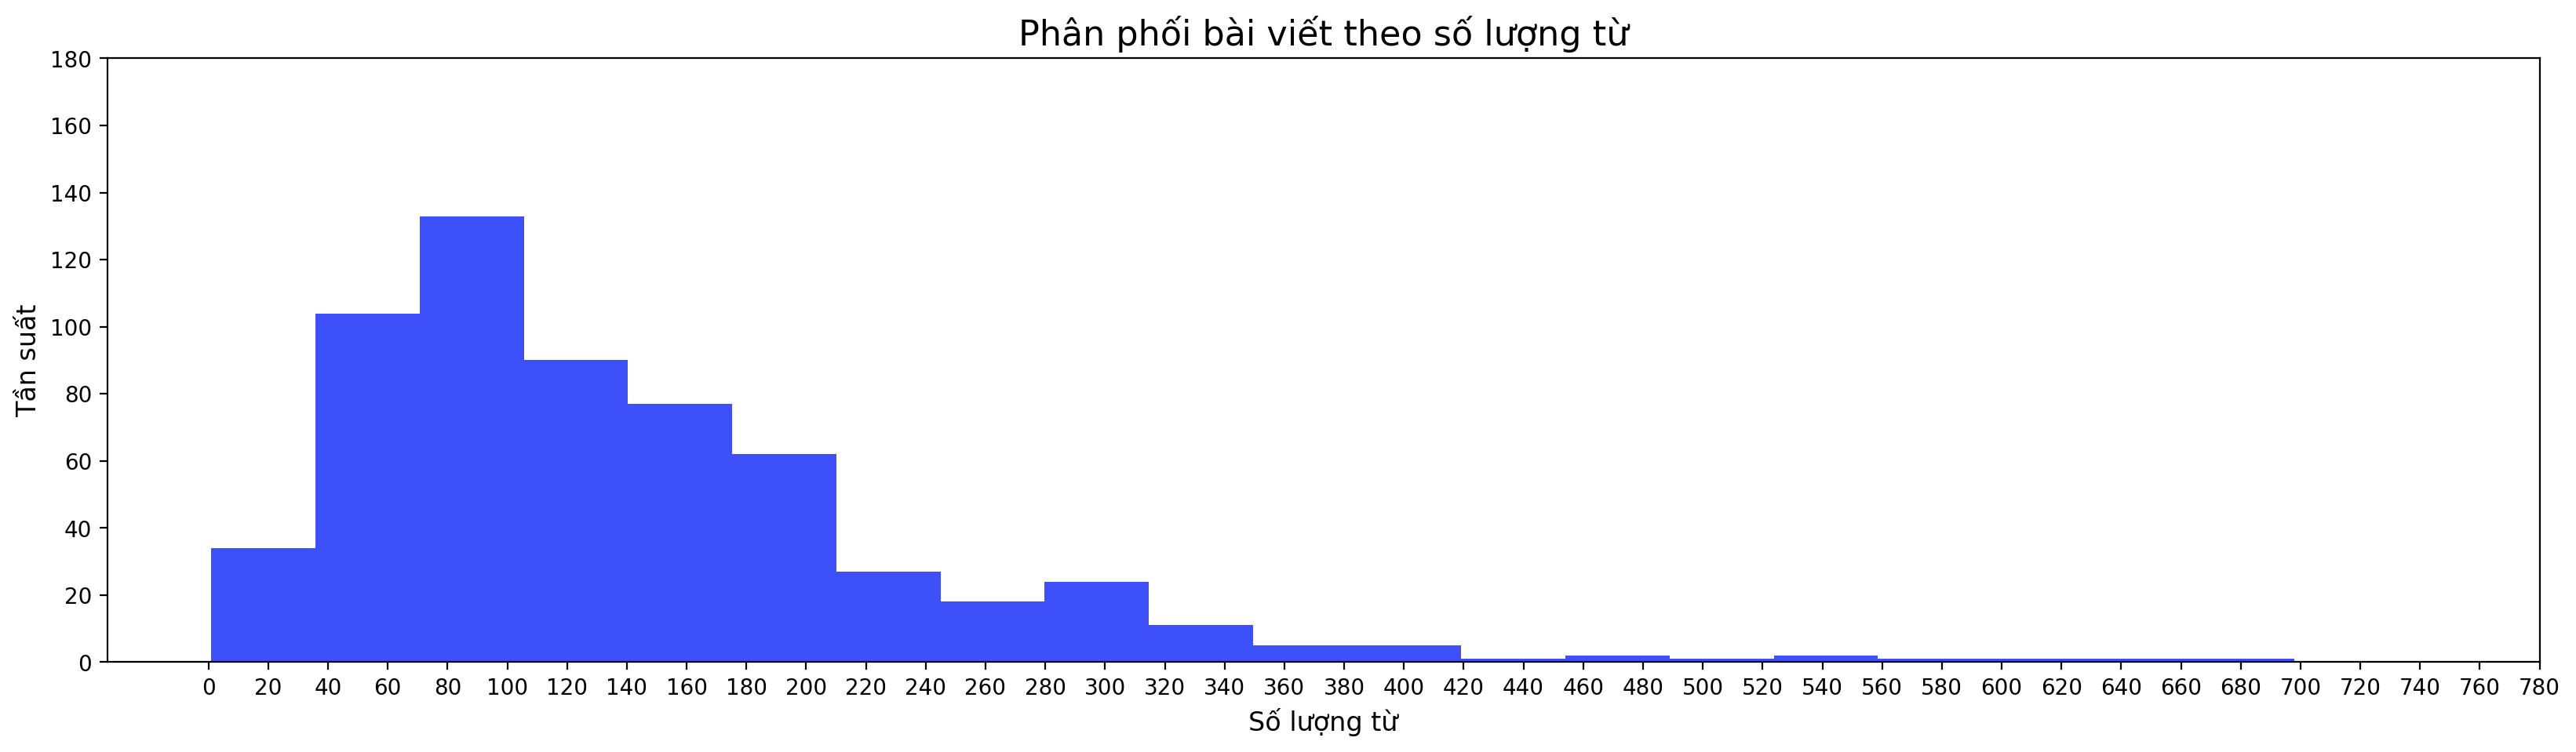

In [19]:
fig = plt.figure(figsize=(20,5), dpi=200)
plt.hist(
    papers['docs_len'],
    bins=20,
    color='#3D50FA'
)

plt.title('Phân phối bài viết theo số lượng từ', fontsize=16)
plt.ylabel('Tần suất', fontsize=12)
plt.xlabel('Số lượng từ', fontsize=12)
plt.yticks(np.arange(0, 200, 20))
plt.xticks(np.arange(0, 800, 20))

In [20]:
words = [word for doc in docs for word in doc.split()]
top_20_word = pd.DataFrame(Counter(words).most_common(20), columns=['word', 'frequency'])
top_20_word.head()

word  frequency
0     dự_án        569
1       hai        559
2     đường        553
3      tỉnh        493
4  việt_nam        481

In [21]:
color_green = '#0AF712'
color_red='#FA4D43'
color_blue ='#3D50FA'
def autolabel(rects,ax):
    for rect in rects:
        height = rect.get_height() # get height of bar
        # ax.annotate -> add text for bar
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height), # x,y location of text
                    xytext=(0, 3),  # 3 points vertical offset # text location <-> height
                    textcoords="offset points",
                    ha='center', va='bottom')

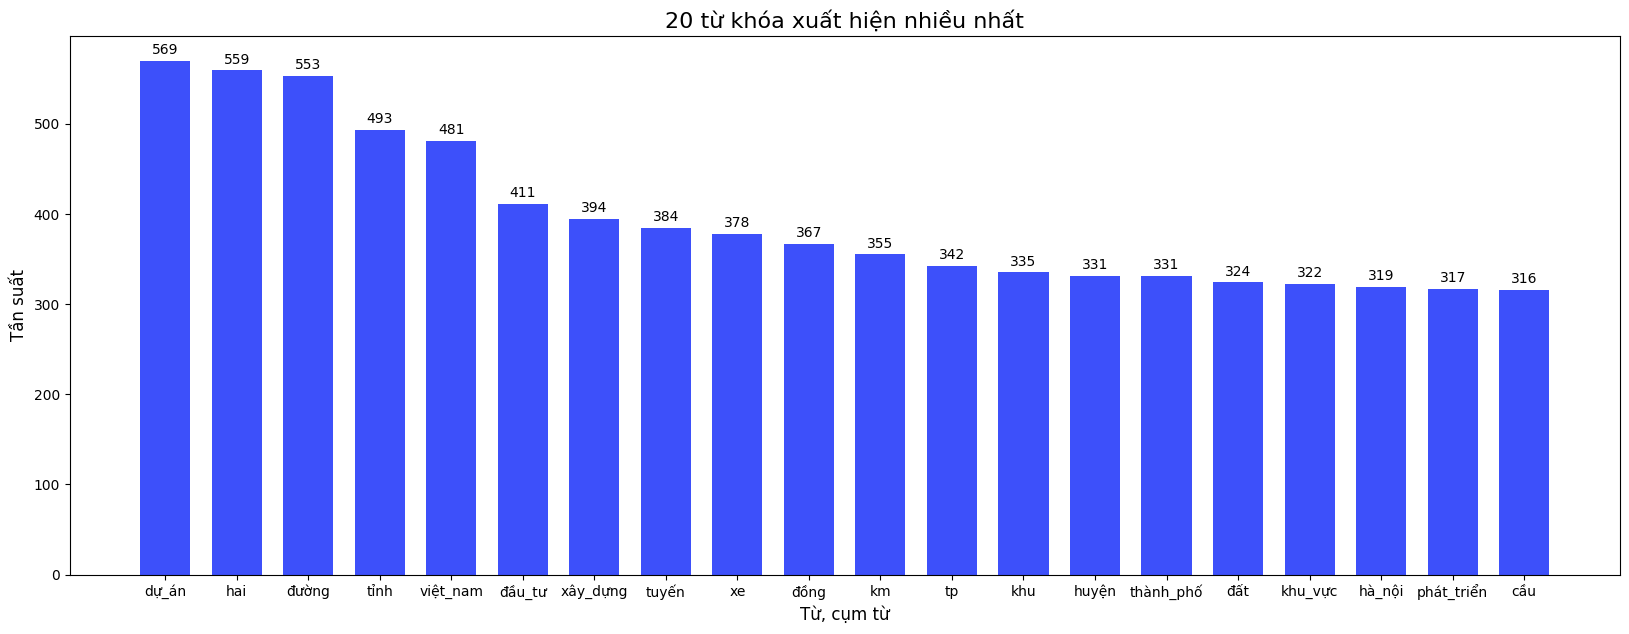

In [22]:
import seaborn as sns
width = 0.7 

fig,ax = plt.subplots(figsize=(20,7))
x = np.arange(top_20_word['word'].shape[0])
rect = ax.bar(x,top_20_word['frequency'],width, color=color_blue)

ax.set_xticks(x)
ax.set_xticklabels(top_20_word['word'])
ax.set_ylabel('Tần suất', fontsize=12)
ax.set_title('20 từ khóa xuất hiện nhiều nhất', fontsize=16)
ax.set_xlabel('Từ, cụm từ', fontsize=12)
autolabel(rect,ax)
plt.show()

Name
0_ôtô_tải_ngược_lại_chở_tài_xế                  41
1_xúc_phạm_công_ty_cổ_phần_đại_nam_ca_sĩ...    137
2_ga_hà_nội_depot_nhà_ga_hoàn_thành             36
3_chung_cư_khương_đình_chữa_cháy_xây            58
4_cá_sấu_lũ_mưa_lũ_sạt_lở                       63
5_hoàn_thành_rộng_cải_tạo_trần_đề               86
6_tổng_thống_đón_sân_bay_quốc_phòng             44
7_bảo_hiểm_xã_hội_việt_nam_bảo_hiểm_xã_h...     34
8_sông_phan_nạo_vét_bộ_giao_thông_vận_tả...     50
9_đoạn_hoàn_thành_ngược_lại_làn                 45
Name: count, dtype: int64


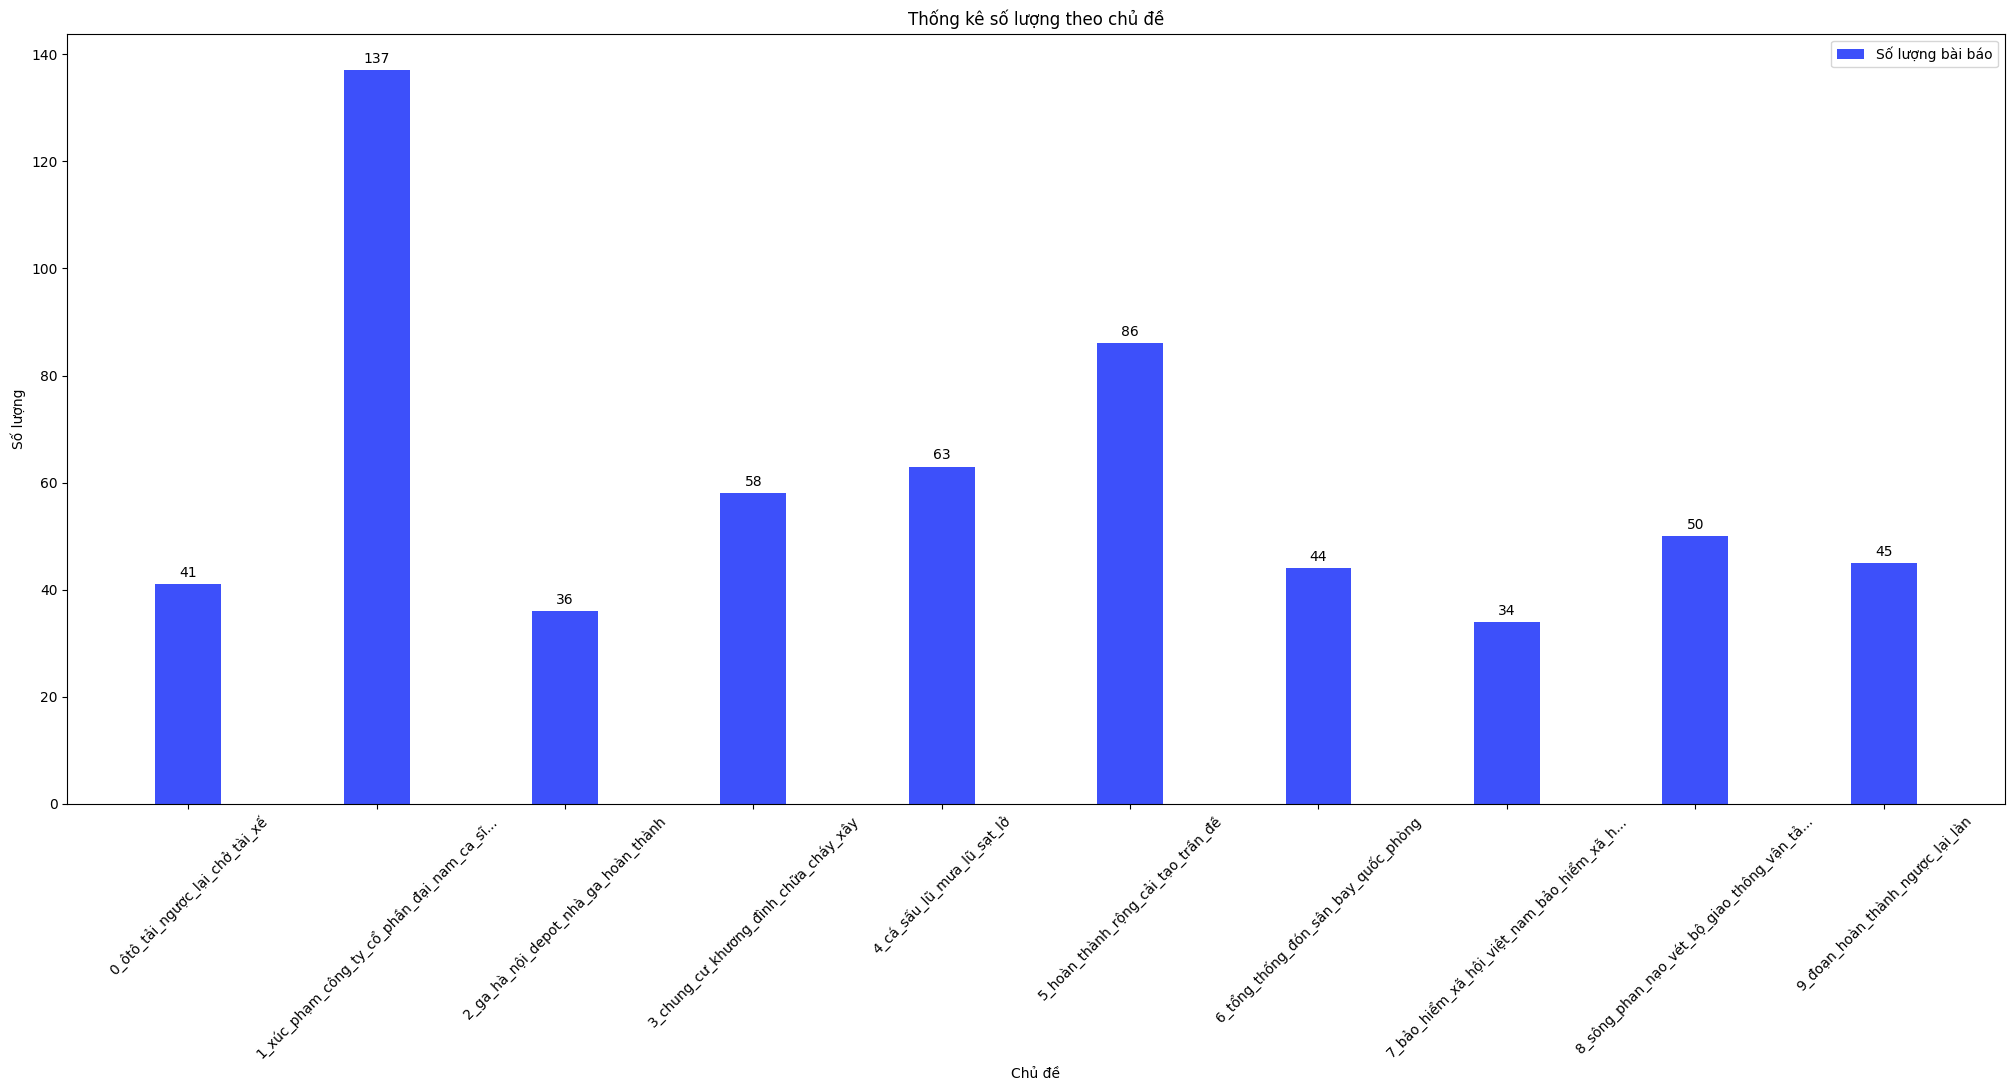

In [23]:
x = np.arange(topic_model.nr_topics)
width = 0.35 # the width of the bars
# count values
count_values = topics_per_class['Name'].value_counts().sort_index()
print(count_values)
fig, ax = plt.subplots(figsize=(25, 10))
rect_docs = ax.bar(x, count_values.values,width, color=color_blue,label='Số lượng bài báo')
ax.set_xticks(x)
ax.set_xticklabels(count_values.index, rotation=45)# , rotation=45
ax.set_xlabel("Chủ đề")
ax.set_ylabel("Số lượng")
ax.set_title("Thống kê số lượng theo chủ đề")

ax.legend()
autolabel(rect_docs,ax)

plt.show()

In [ ]:
df = pd.DataFrame({'Name':count_values.index, 'Value':count_values.values})

In [24]:
print(timestamps)
import datetime
import re
timestamps = papers.date.to_list()
timestamps = [re.sub(r'\s+', ' ', timestamp).strip() for timestamp in timestamps]
timestamps1 = [re.sub(r',','',time.split()[2]) for time in timestamps]
print(timestamps1)
timestamp_ = [datetime.datetime.strptime(timestamp, "%d/%m/%Y").date() for timestamp in timestamps1]
print(timestamp_)
timestamp_ = [str(time.year)+'-'+str(time.month)+'-'+str(time.day) for time in timestamp_]
print(timestamp_)

['Thứ tư, 20/9/2023, 18:49 (GMT+7)\n', 'Thứ năm, 21/9/2023, 01:29 (GMT+7)\n', 'Thứ năm, 21/9/2023, 00:00 (GMT+7)\n', 'Thứ tư, 20/9/2023, 22:11 (GMT+7)\n', 'Thứ tư, 20/9/2023, 19:04 (GMT+7)\n', 'Thứ tư, 20/9/2023, 17:02 (GMT+7)\n', 'Thứ năm, 21/9/2023, 08:00 (GMT+7)\n', 'Thứ tư, 13/9/2023, 17:00 (GMT+7)\n', 'Thứ hai, 11/9/2023, 14:00 (GMT+7)\n', 'Chủ nhật, 6/8/2023, 00:00 (GMT+7)\n', 'Thứ tư, 20/9/2023, 11:57 (GMT+7)\n', 'Thứ tư, 9/8/2023, 22:06 (GMT+7)\n', 'Thứ bảy, 2/9/2023, 00:00 (GMT+7)\n', 'Thứ ba, 8/8/2023, 13:43 (GMT+7)\n', 'Chủ nhật, 3/9/2023, 00:00 (GMT+7)\n', 'Thứ tư, 9/8/2023, 17:48 (GMT+7)\n', 'Thứ tư, 20/9/2023, 11:25 (GMT+7)\n', 'Thứ năm, 21/9/2023, 06:24 (GMT+7)\n', 'Thứ sáu, 1/9/2023, 00:00 (GMT+7)\n', 'Thứ tư, 20/9/2023, 16:46 (GMT+7)\n', 'Thứ tư, 20/9/2023, 16:25 (GMT+7)\n', 'Thứ tư, 20/9/2023, 16:10 (GMT+7)\n', 'Thứ tư, 20/9/2023, 15:03 (GMT+7)\n', 'Thứ tư, 20/9/2023, 14:08 (GMT+7)\n', 'Thứ tư, 20/9/2023, 13:26 (GMT+7)\n', 'Thứ tư, 20/9/2023, 12:45 (GMT+7)\n', 'Thứ tư

In [25]:
topics_over_time = topic_model.topics_over_time(docs, timestamp_, datetime_format="%Y-%m-%d", nr_bins=10)

0it [00:00, ?it/s]

8it [00:09,  1.23s/it]


In [26]:
topic_model.visualize_topics_over_time(topics_over_time)

In [27]:
topics_over_time.head()

Topic                                              Words  Frequency  \
0      6  viễn_thông, công_an_tỉnh_kon_tum, sửa_đổi, thô...          1   
1      1  cải_cách, hành_chính, cntt, con_người, công_ng...          1   
2      1  iot_việt_nam, mm_iot, viễn_thông, iot_việt, mo...          1   
3      6     thủ_đô_hà_nội, hà_nội, mật_độ, định_hướng, hóa          1   
4      0   nguyễn_tấn_xôn, ôtô_tải, ngược_lại, chở, ôtô_con         16   

                Timestamp                                         Name  
0 2023-06-21 21:48:57.600          6_tổng_thống_đón_sân_bay_quốc_phòng  
1 2023-07-10 04:48:00.000  1_xúc_phạm_công_ty_cổ_phần_đại_nam_ca_sĩ...  
2 2023-07-28 09:36:00.000  1_xúc_phạm_công_ty_cổ_phần_đại_nam_ca_sĩ...  
3 2023-07-28 09:36:00.000          6_tổng_thống_đón_sân_bay_quốc_phòng  
4 2023-08-06 12:00:00.000               0_ôtô_tải_ngược_lại_chở_tài_xế

In [28]:
time = "2023-09-20"
topic = 1
def get_top_word_in_topic(topic, time):
    top_words = pd.to_datetime(topics_over_time["Timestamp"]).dt.strftime("%Y-%m-%d %H:%M:%S")
    top_words = topics_over_time[topics_over_time["Topic"] == topic].sort_values(by="Timestamp", ascending=False)
    top_words_ = top_words[top_words["Timestamp"] <= time]
    if top_words_.shape[0] == 0:
        return "No topic found or time is too early"
    return top_words_.iloc[0]["Words"], top_words_.iloc[0]["Timestamp"]
print(get_top_word_in_topic(topic, time))

('xúc_phạm, công_ty_cổ_phần_đại_nam, vu_khống, ca_sĩ, phát_ngôn', Timestamp('2023-09-11 21:36:00'))


In [29]:
d = pd.DataFrame({"Document": docs, "Topic": topic_model.topics_, "ID": range(len(docs)),'location':papers['location'],'date':papers['date'],'person':papers['person'],'organization':papers['organization'],'timestamp':timestamp_})
d.head(10)

Document  Topic  ID  \
0  mỏ cát giao nằm sông tiền xã an_nhơn huyện_châ...      2   0   
1  lãnh_đạo chính_phủ việt_nam trao huân_chương a...      1   1   
2  công_văn chấm_dứt hoạt_động bến phà an_bình ph...      8   2   
3  chiều tiếp_xúc cử_tri tây_hồ kỳ họp quốc_hội k...      3   3   
4  ban quản_lý rừng_phòng_hộ đầu liên_hồ sông sắt...      1   4   
5  công_trình thay_thế cầu cũ nằm đường rộng làn ...      2   5   
6  lễ trẻ_em đồng_văn hoạt_động đố vui thưởng gấu...      5   6   
7  đại_diện quỹ hy_vọng nhãn hàng men ống vi_sinh...      5   7   
8  bác_sĩ nguyễn_trần nam_phó giám_đốc bệnh_viện ...      8   8   
9  mở_rộng quy_hoạch thủ_đô hà_nội mục_tiêu giãn ...      6   9   

                                            location  \
0  ['huyện Châu Thành', 'cao tốc Bắc Nam phía Đôn...   
1  ['Việt Nam', 'Việt Nam', 'Việt Nam', 'Việt Nam...   
2  ['huyện Long Hồ', 'tỉnh Vĩnh Long', 'TP Vĩnh L...   
3  ['quận Thanh Xuân', 'TP HCM', 'Hà Nội', 'phườn...   
4                   ['xã Phước Đại', 'huyện Bác Ái']   
5  ['thành phố Nha Trang', 'cầu Trần Phú', 'TP Nh...   
6  ['Đồng Văn', 'Đồng Văn', 'tỉnh Sơn La', 'Hà Gi...   
7  ['huyện Đồng Văn', 'Đồng Văn', 'tỉnh Sơn La', ...   
8                                         ['TP HCM']   
9  ['Hà Nội', 'Sóc Sơn', 'Mê Linh', 'Sóc Sơn', 's...   

                                  date  \
0   Thứ tư, 20/9/2023, 18:49 (GMT+7)\n   
1  Thứ năm, 21/9/2023, 01:29 (GMT+7)\n   
2  Thứ năm, 21/9/2023, 00:00 (GMT+7)\n   
3   Thứ tư, 20/9/2023, 22:11 (GMT+7)\n   
4   Thứ tư, 20/9/2023, 19:04 (GMT+7)\n   
5   Thứ tư, 20/9/2023, 17:02 (GMT+7)\n   
6  Thứ năm, 21/9/2023, 08:00 (GMT+7)\n   
7   Thứ tư, 13/9/2023, 17:00 (GMT+7)\n   
8  Thứ hai, 11/9/2023, 14:00 (GMT+7)\n   
9  Chủ nhật, 6/8/2023, 00:00 (GMT+7)\n   

                                              person  \
0                                       ['Ngọc Tài']   
1  ['Au ##ré ##lia Nguyễn', 'Au ##ré ##lia Nguyễn...   
2                                ['Sơn', 'Cửu Long']   
3  ['Trung', 'Trung', 'Nghiêm Quang Minh', 'Võ Hải']   
4                                      ['Việt Quốc']   
5                                       ['Bùi Toàn']   
6                ['Minh', 'Minh', 'Giàng Ngọc Minh']   
7                                                 []   
8                           ['Nam', 'Nam', 'Chi Lê']   
9  ['Nghiêm', 'Trần Ngọc Chính', 'Chính', 'Trịnh ...   

                                        organization  timestamp  
0                                                 []  2023-9-20  
1               ['Liên minh Sáng kiến Sẵn sàng Đối']  2023-9-21  
2       ['UBND TP Vĩnh Long', 'UBND tỉnh Vĩnh Long']  2023-9-21  
3              ['Công an Hà Nội', 'Thành ủy Hà Nội']  2023-9-20  
4  ['Sở Nông nghiệp và Phát triển nông thôn tỉnh ...  2023-9-20  
5                                                 []  2023-9-20  
6  ['trường PTDT BT Tiểu học Ma Lé', 'Enter ##oge...  2023-9-21  
7  ['Phòng Giáo dục và Đào tạo huyện Đồng Văn', '...  2023-9-13  
8                                                 []  2023-9-11  
9                      ['Ủy ban Thường vụ Quốc hội']   2023-8-6

In [30]:
print(words)
idx = np.where(words =='_mỹ_thuận')
idx

['mỏ', 'cát', 'giao', 'nằm', 'sông', 'tiền', 'xã', 'an_nhơn', 'huyện_châu_thành', 'tiếp_nhận', 'tổng_công_ty', 'xây_dựng', 'ctcp', 'nhà_thầu', 'thi_công', 'dự_án', 'thành_phần', 'đoạn', 'cần_thơ', 'hậu_giang', 'hậu_giang', 'cà_mau', 'dự_án', 'cao_tốc_bắc_nam_phía_đông', 'đồng_tháp', 'giao', 'cung_ứng', 'triệu', 'dự_án', 'cao_tốc_cần_thơ_cà_mau', 'tổng_số', 'triệu', 'công_trình', 'cát', 'chính_phủ', 'giao', 'an_giang', 'vĩnh_long', 'trách_nhiệm', 'cung_ứng', 'song', 'hai', 'địa_phương', 'bàn_giao', 'cao_tốc_cần_thơ_cà_mau', 'km', 'tuyến', 'nối', 'km', 'rộng', 'làn', 'tổng', 'vốn', 'đầu_tư', 'tỷ', 'đồng', 'khởi_công', 'công_trình', 'tuyến', 'đồng_bằng_sông_cửu_long', 'kết_nối', 'tỉnh_thành', 'cầu', 'ngọc_tài', 'lãnh_đạo', 'chính_phủ', 'việt_nam', 'trao', 'huân_chương', 'aurélia', 'nguyễn_nhân_dịp', 'tham_dự', 'phiên', 'thảo_luận', 'đại_hội_đồng', 'liên_hợp', 'quốc_khóa', 'khuya', 'việt_nam', 'huân_chương', 'hữu_nghị', 'nhà_nước', 'việt_nam', 'ghi_nhận', 'aurélia', 'nguyễn', 'công_tác', '

(array([], dtype=int64),)

topic:  0
ôtô_tải 0.35638306
sum doc:  41
sum doc constains ôtô_tải:  4
4
------------------
ngược_lại 0.34843975
sum doc:  41
sum doc constains ngược_lại:  5


5
------------------
chở 0.3479859
sum doc:  41
sum doc constains chở:  12
12
------------------
topic:  1
xúc_phạm 0.30750132
sum doc:  142
sum doc constains xúc_phạm:  8
8
------------------
công_ty_cổ_phần_đại_nam 0.29992887
sum doc:  142
sum doc constains công_ty_cổ_phần_đại_nam:  8
8
------------------
ca_sĩ 0.2636247
sum doc:  142
sum doc constains ca_sĩ:  8
8
------------------
topic:  2
ga_hà_nội 0.44113314
sum doc:  36
sum doc constains ga_hà_nội:  4
4
------------------
depot 0.4273588
sum doc:  36
sum doc constains depot:  6
6
------------------
nhà_ga 0.34215918
sum doc:  36
sum doc constains nhà_ga:  8
8
------------------
topic:  3
chung_cư 0.3920128
sum doc:  58
sum doc constains chung_cư:  33
33
------------------
khương_đình 0.36310846
sum doc:  58
sum doc constains khương_đình:  21
21
------------------
chữa_cháy 0.3589835
sum doc:  58
sum doc constains chữa_cháy:  32
32
------------------
topic:  4
cá_sấu 0.3537271
sum doc:  63
sum doc constains cá_sấu:  2
2
--------

/tmp/ipykernel_27416/587815940.py:50: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



4
------------------
bảo_hiểm_xã_hội 0.37145138
sum doc:  34
sum doc constains bảo_hiểm_xã_hội:  19
19
------------------
rút 0.35261682
sum doc:  34
sum doc constains rút:  11
11
------------------
topic:  8
sông_phan 0.38514012
sum doc:  51
sum doc constains sông_phan:  3
3
------------------
nạo_vét 0.3295203
sum doc:  51
sum doc constains nạo_vét:  4
4
------------------
bộ_giao_thông_vận_tải 0.32757127
sum doc:  51
sum doc constains bộ_giao_thông_vận_tải:  10
10
------------------
topic:  9
đoạn 0.37444335
sum doc:  45
sum doc constains đoạn:  30
30
------------------
hoàn_thành 0.3481709
sum doc:  45
sum doc constains hoàn_thành:  12
12
------------------
ngược_lại 0.31187135
sum doc:  45
sum doc constains ngược_lại:  6
6
------------------


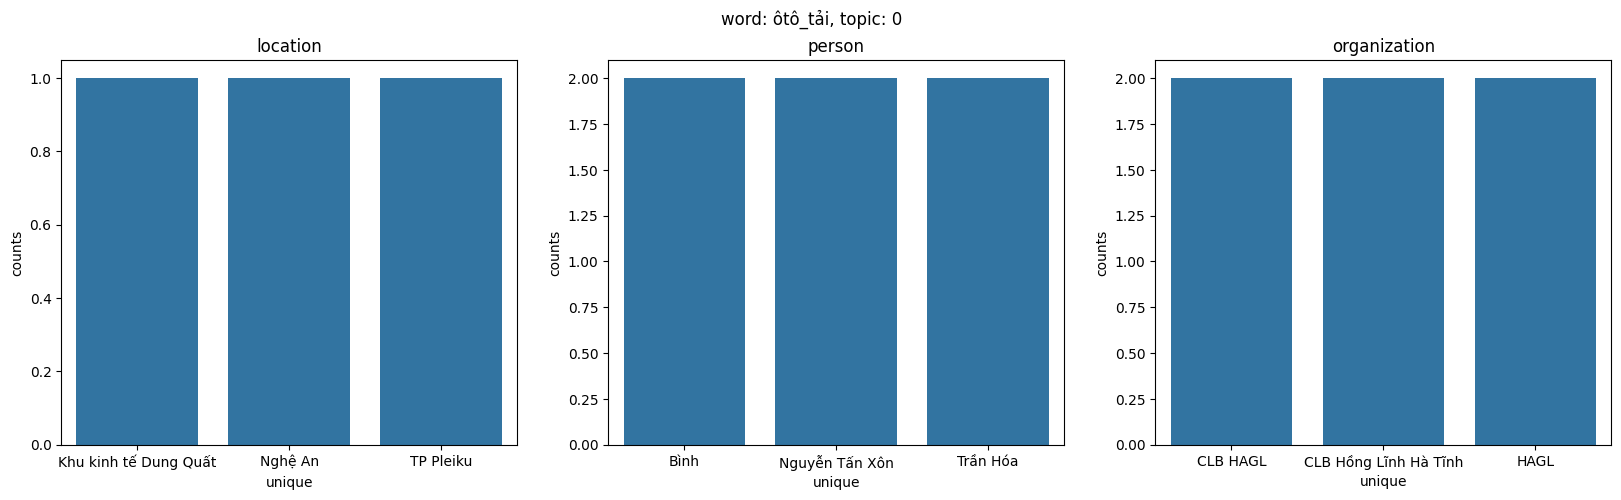

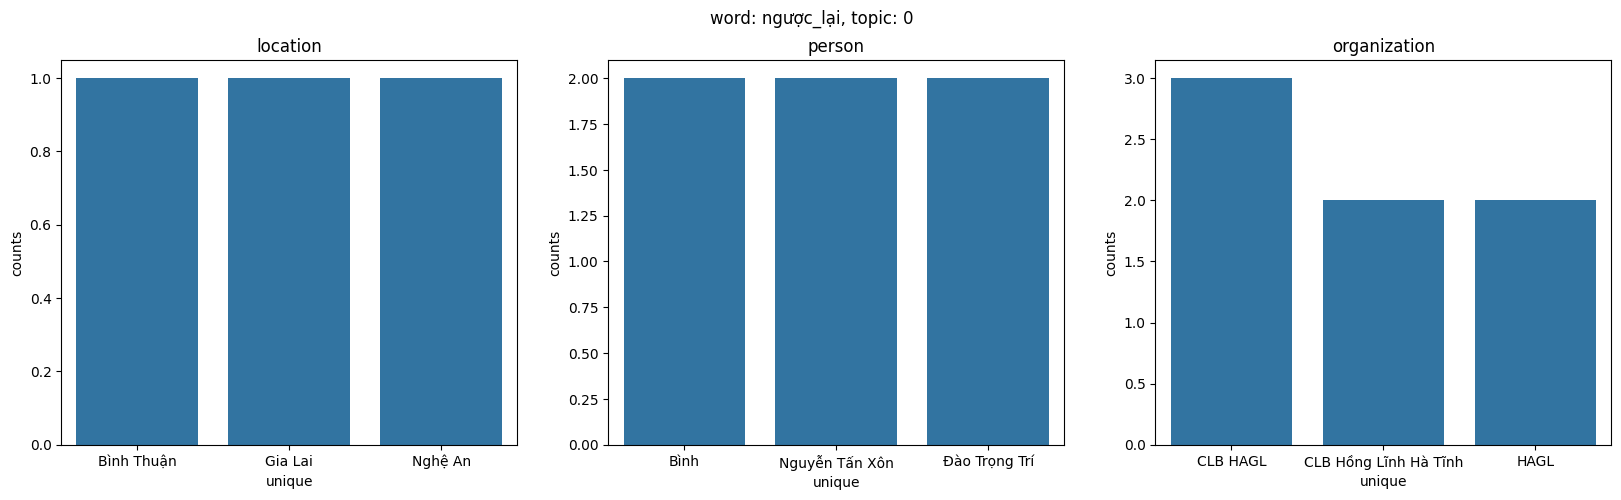

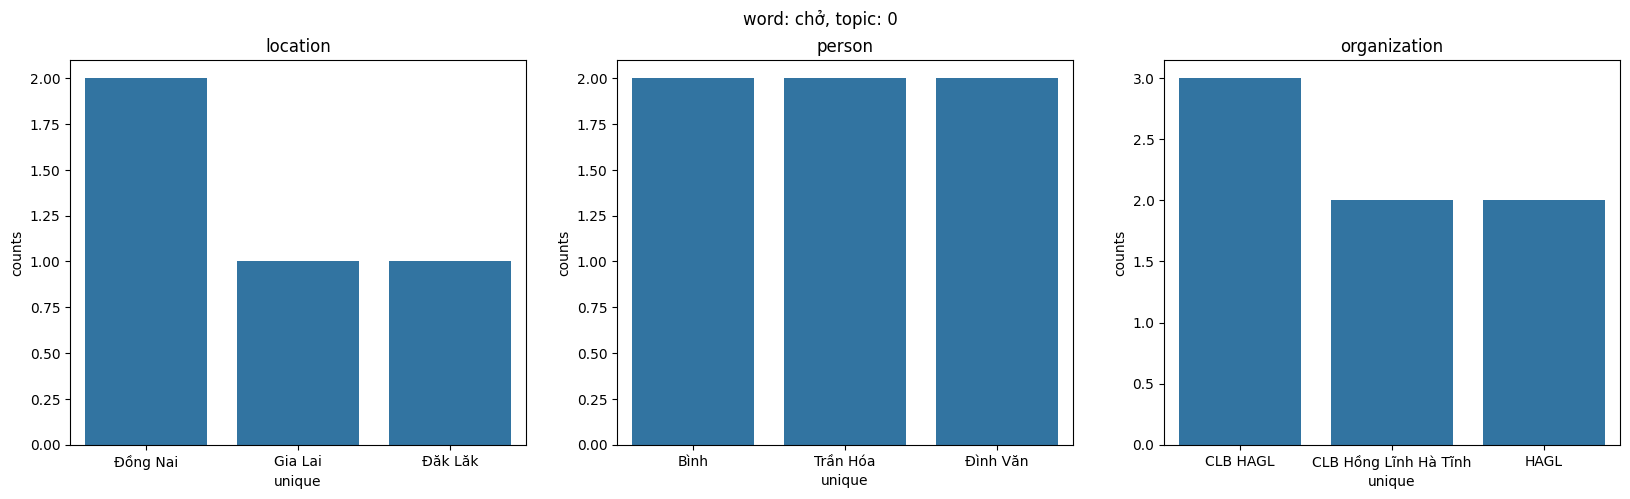

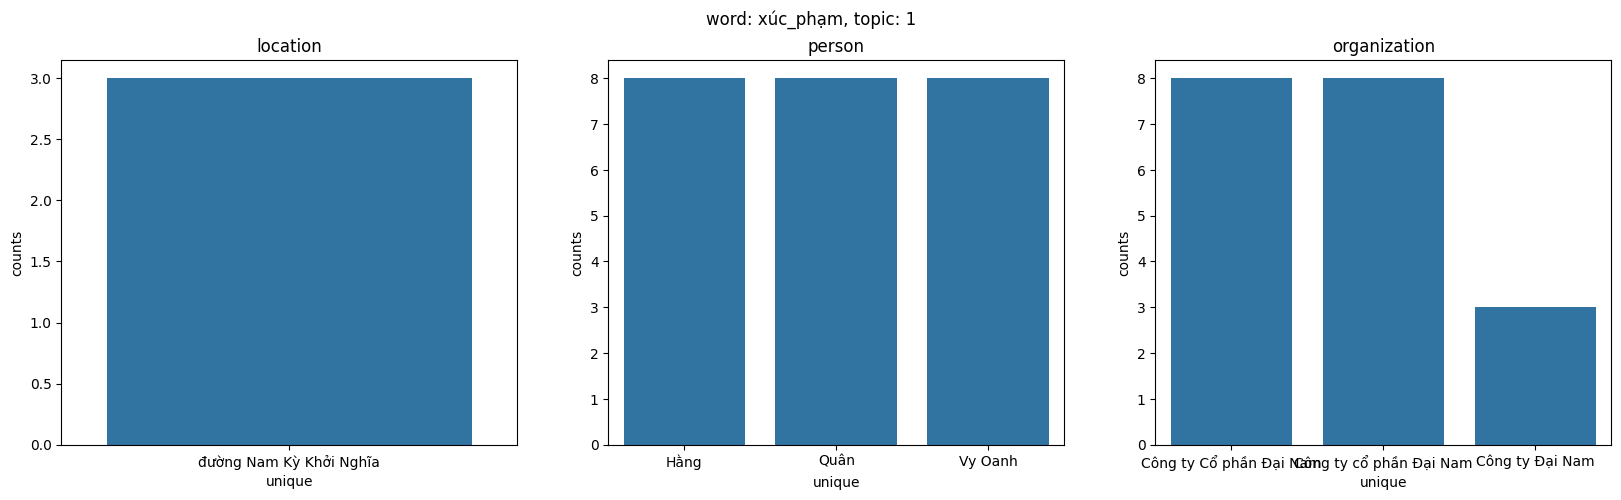

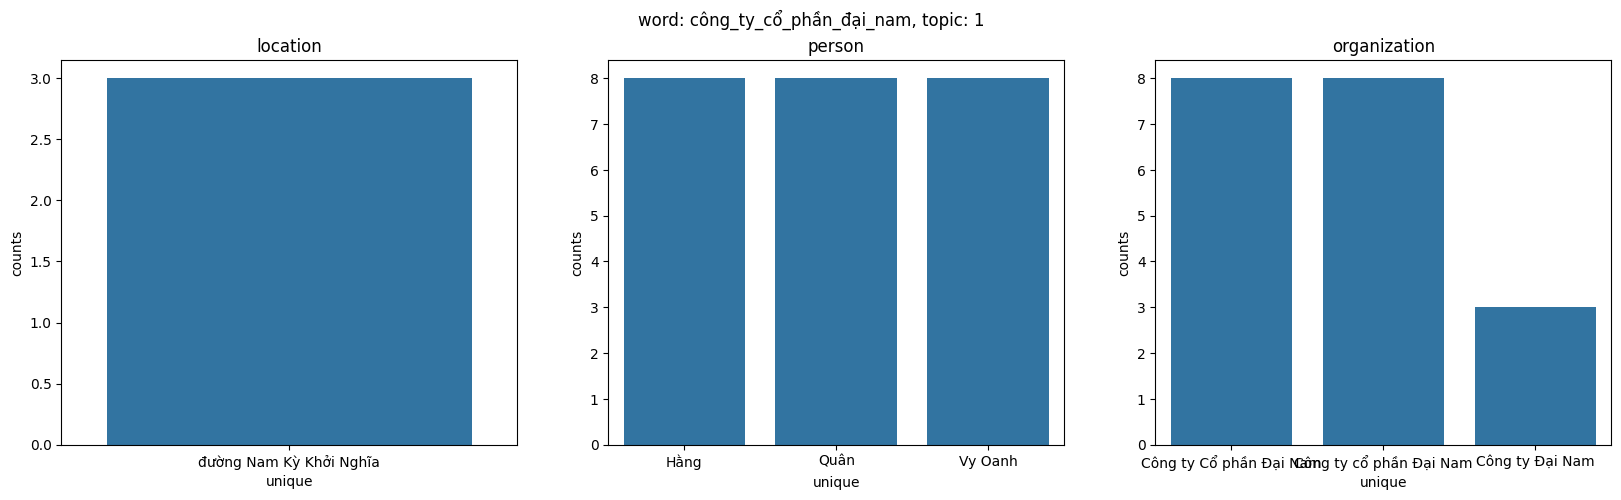

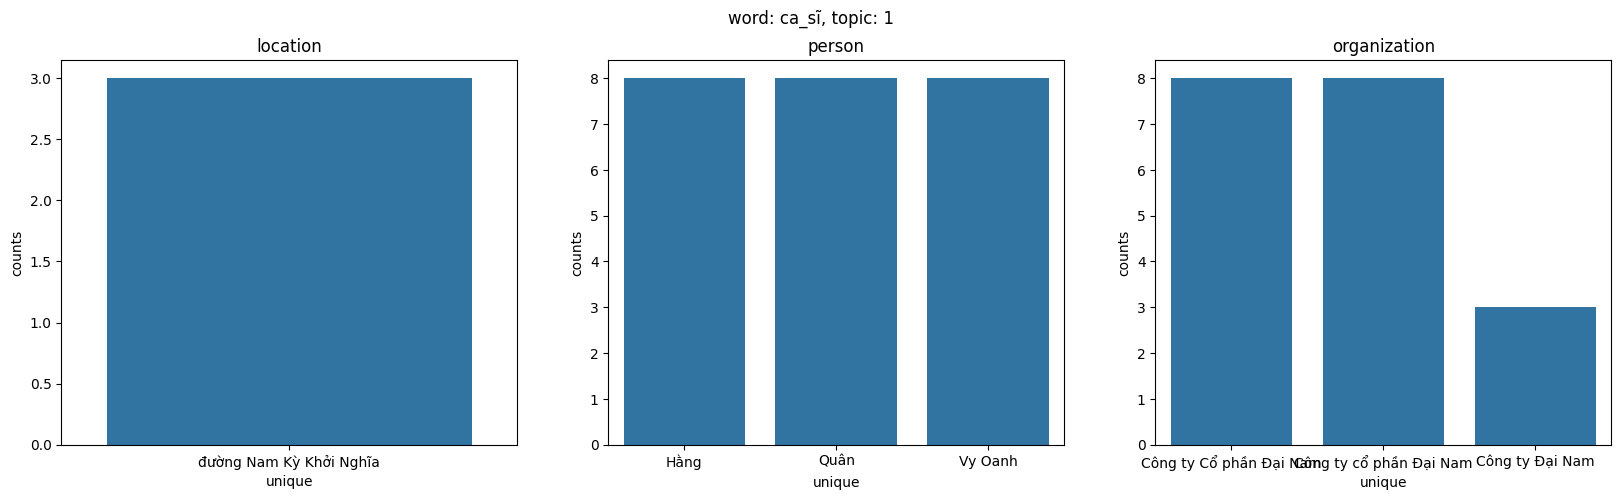

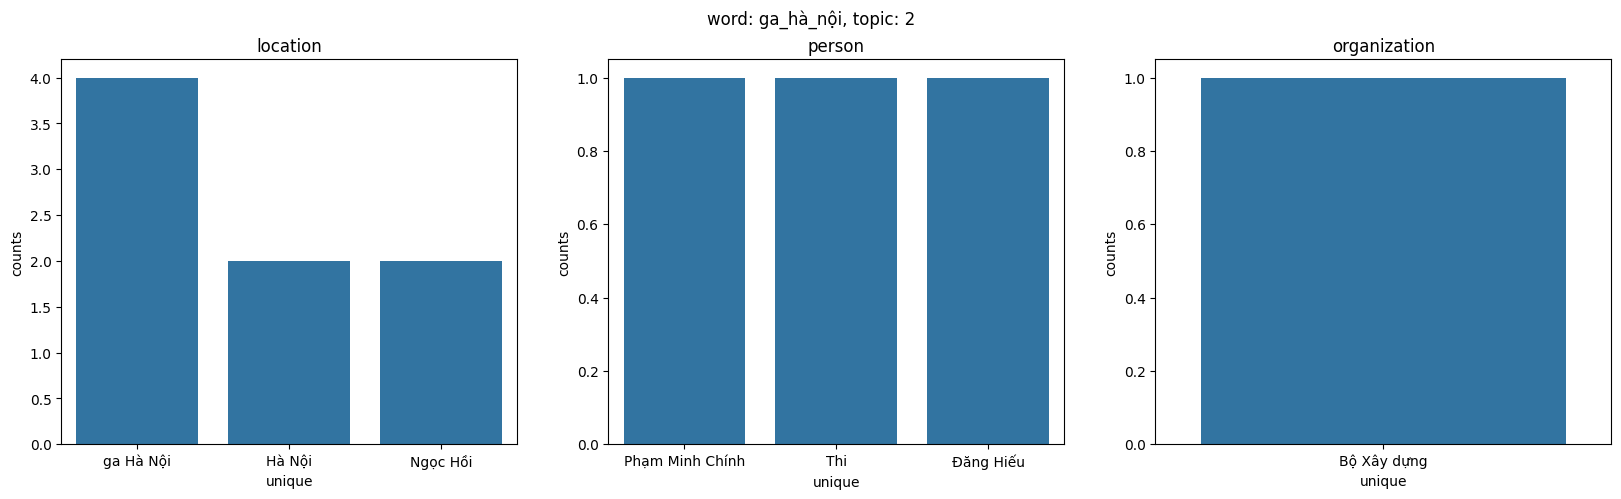

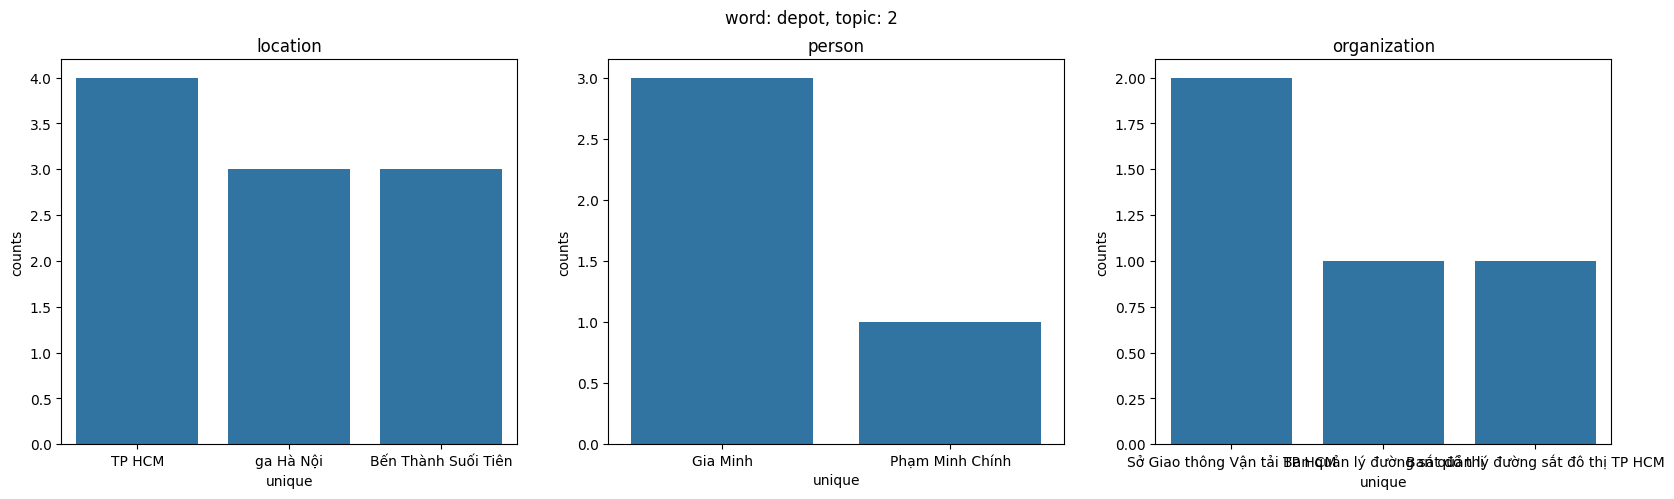

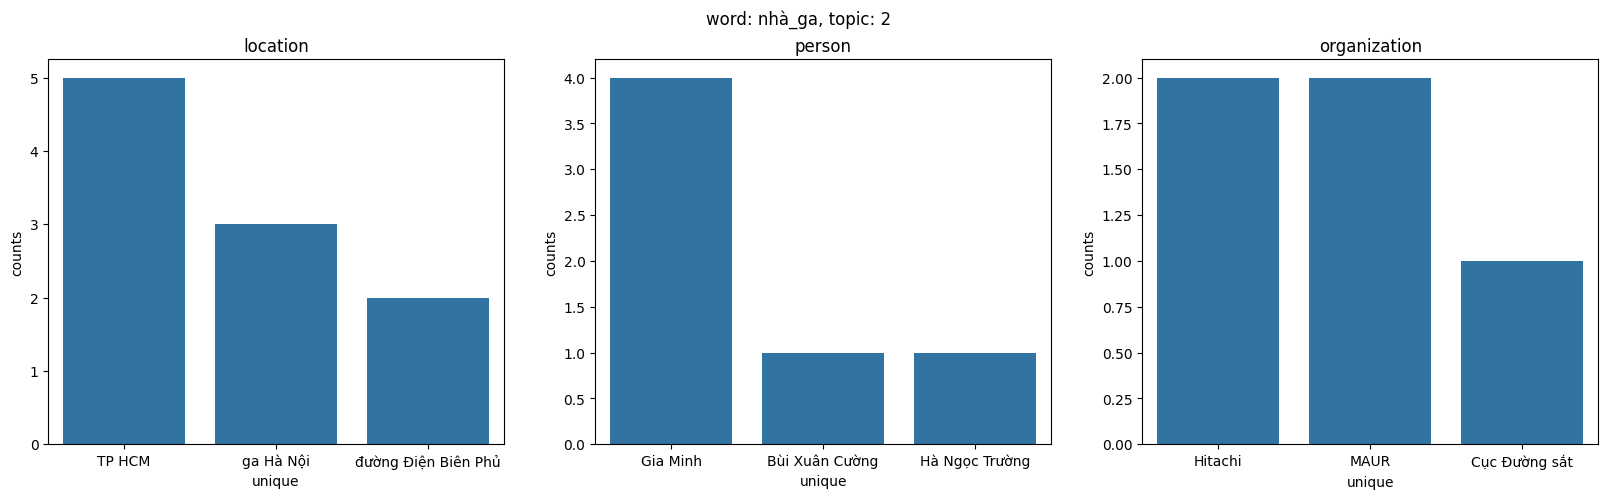

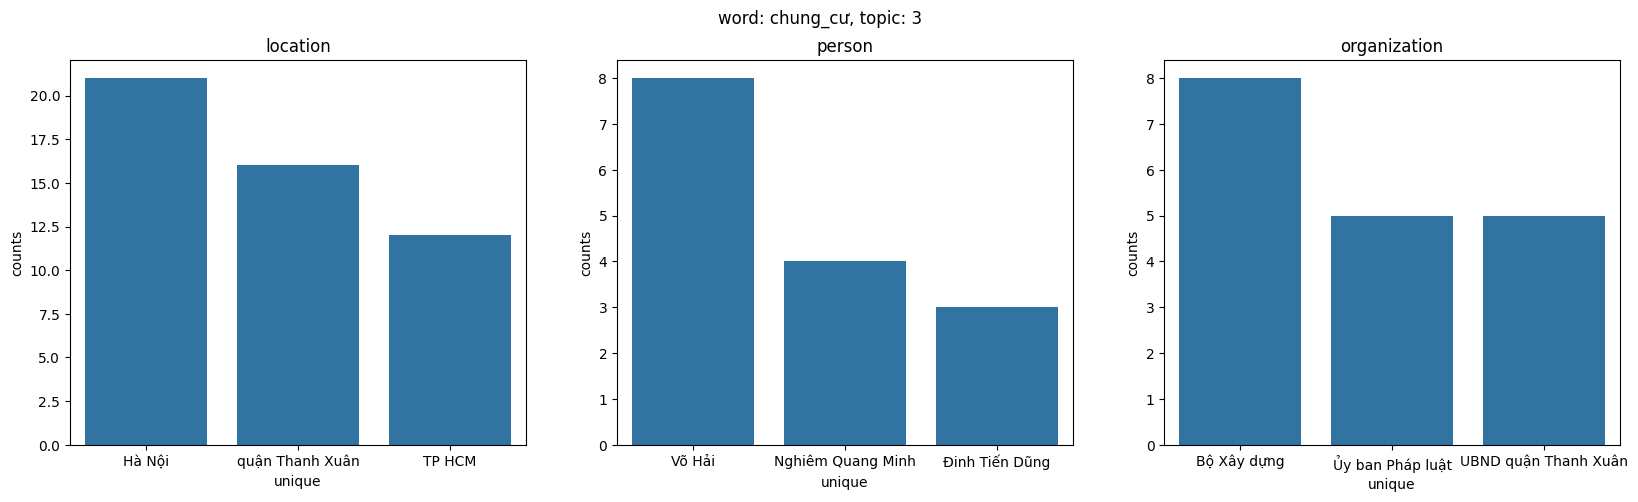

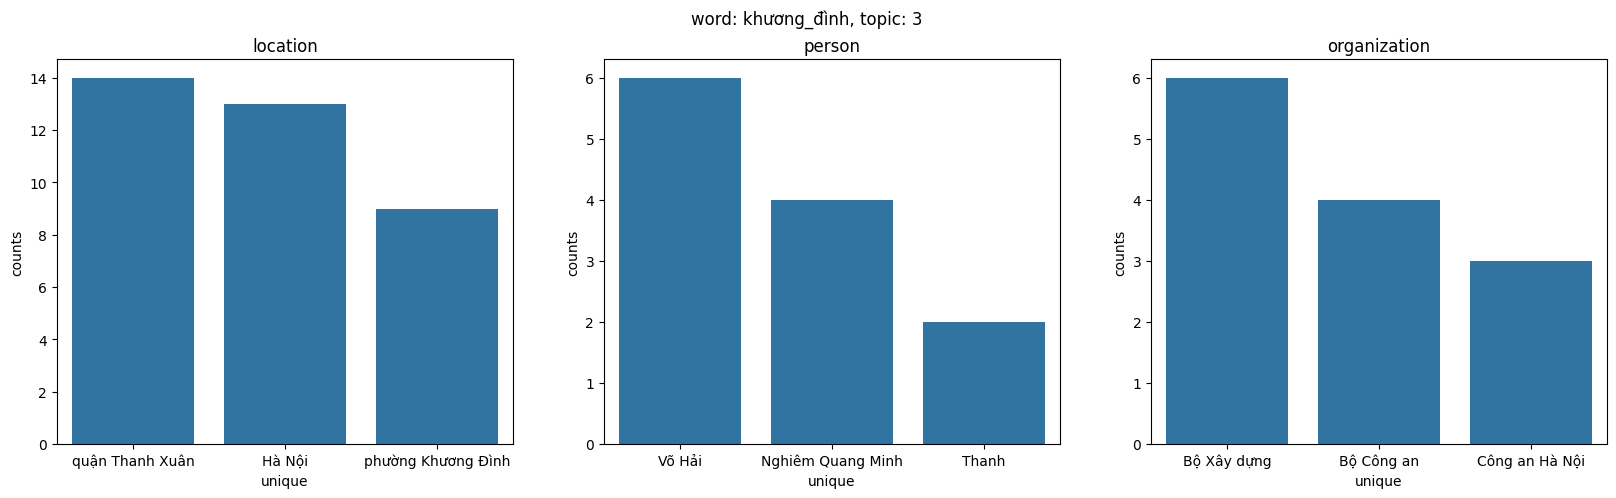

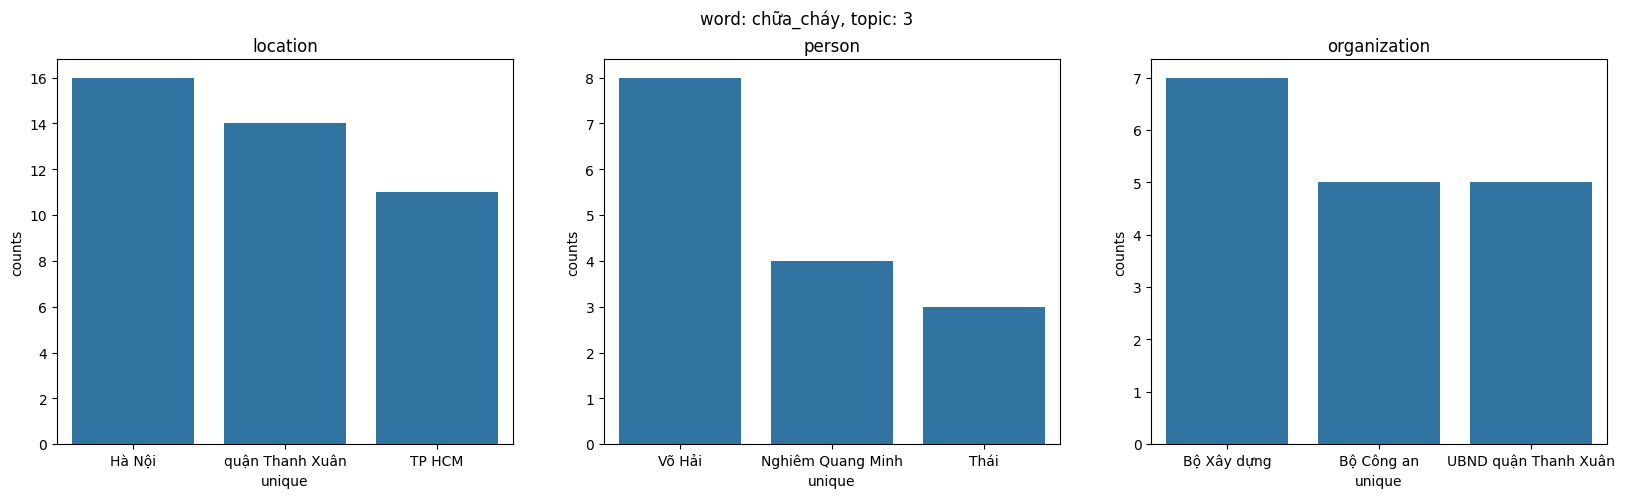

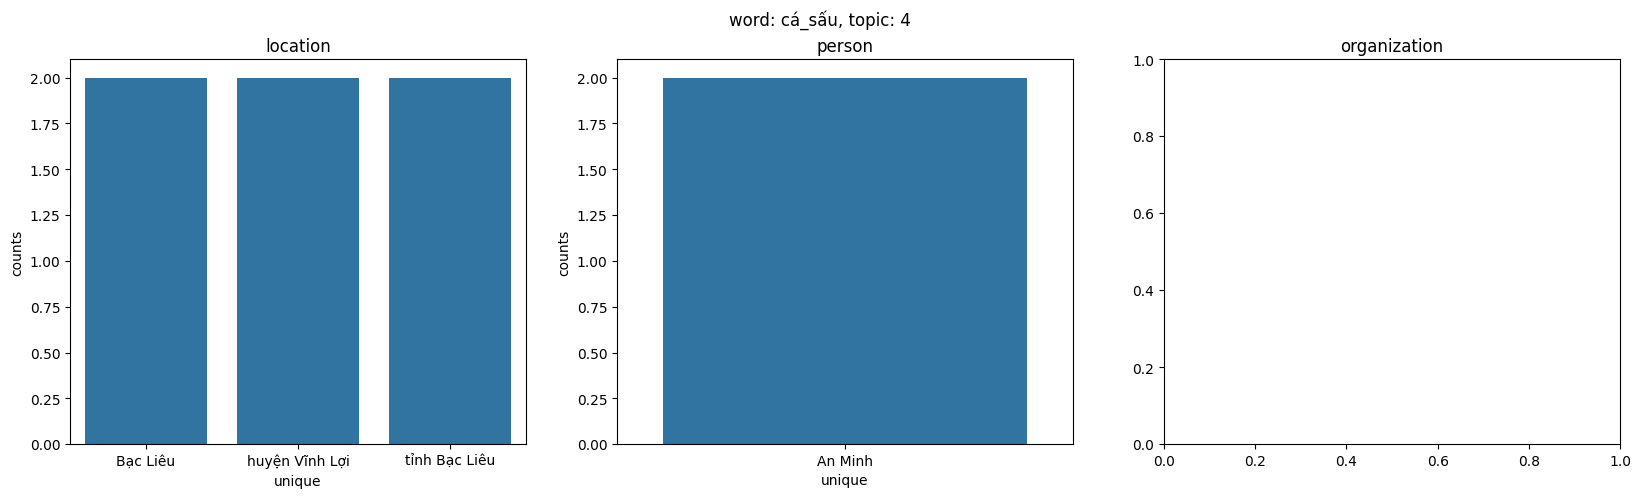

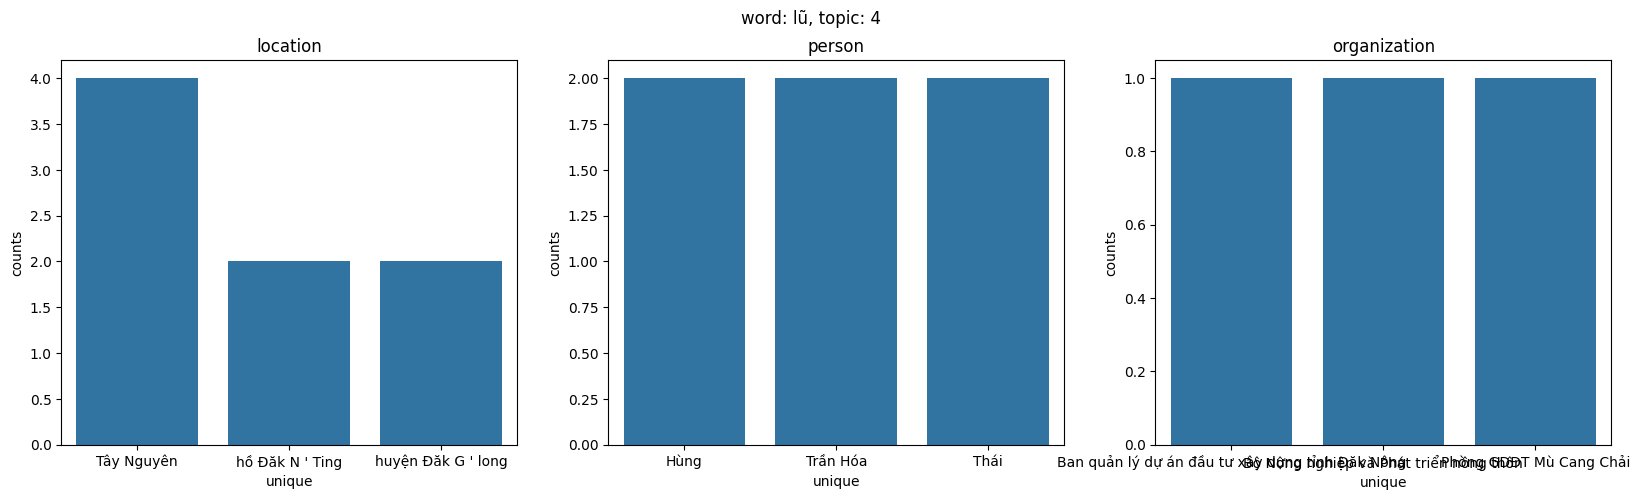

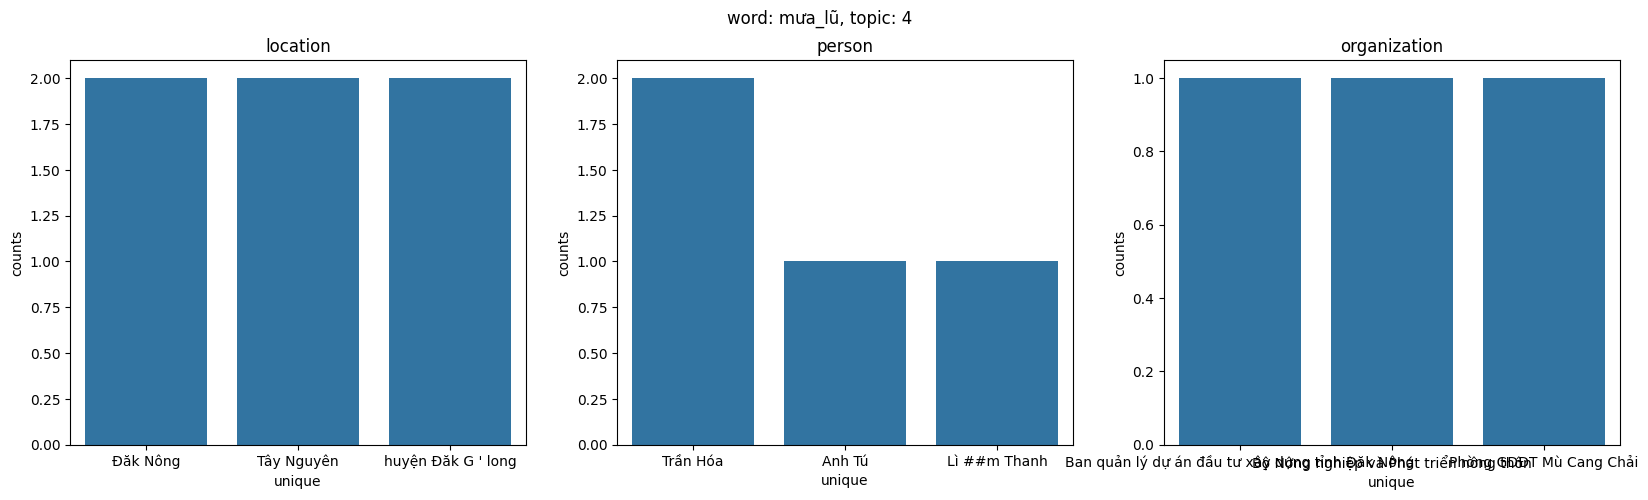

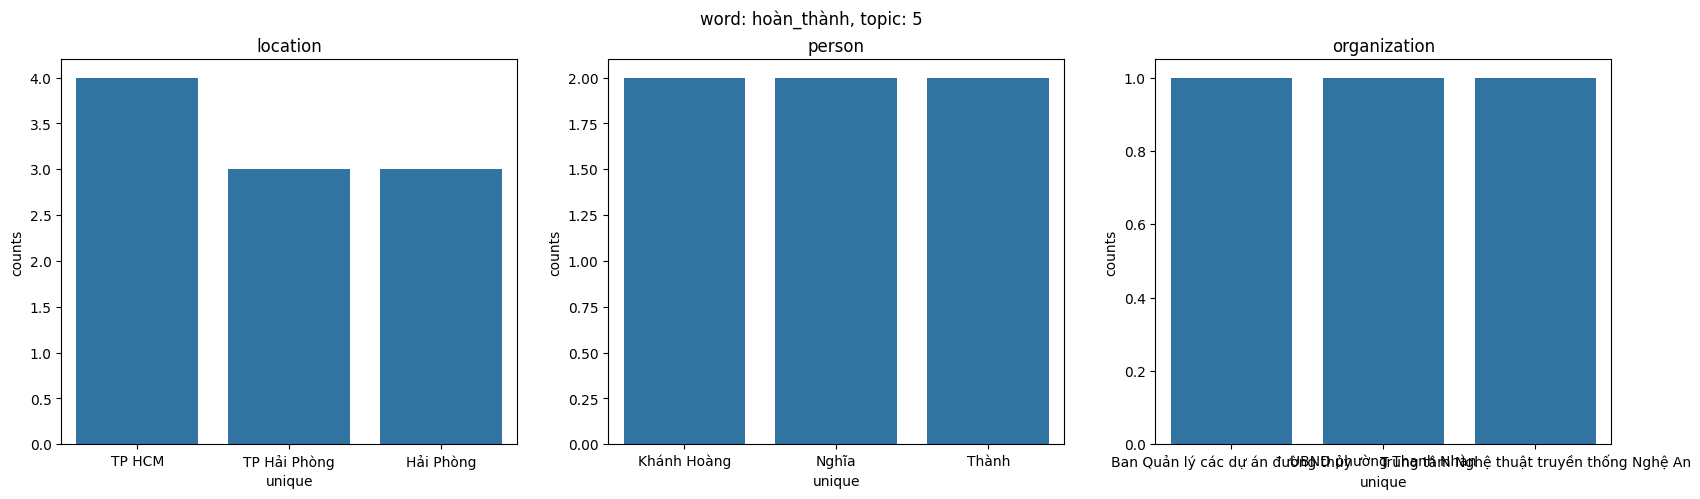

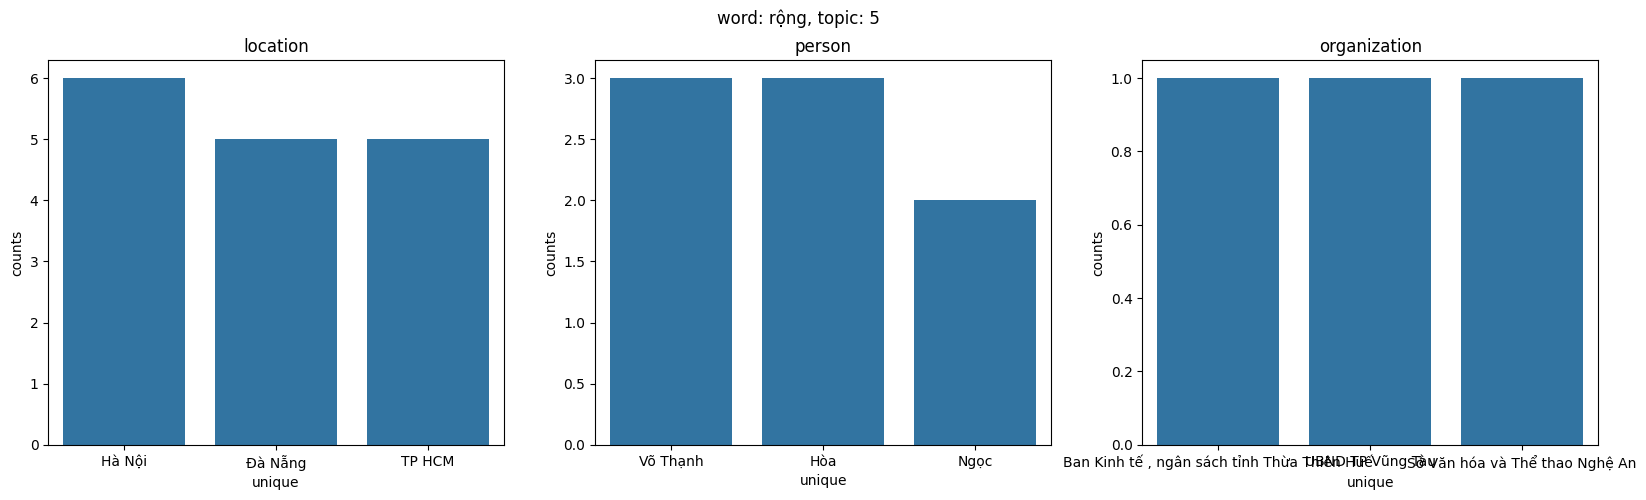

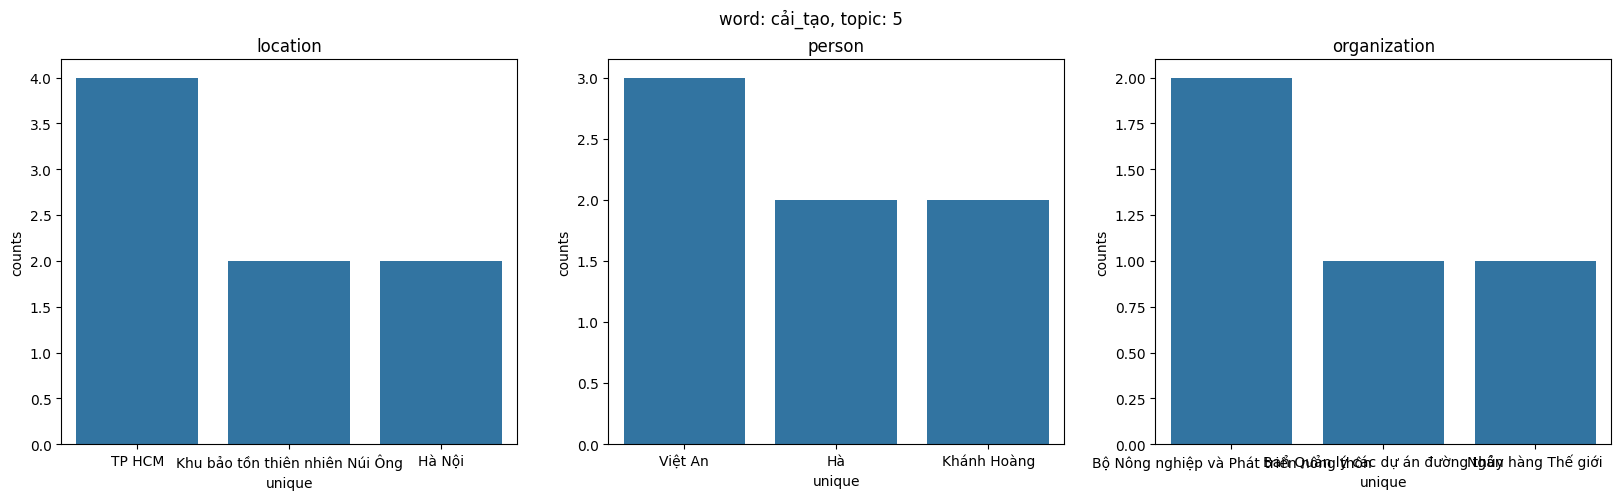

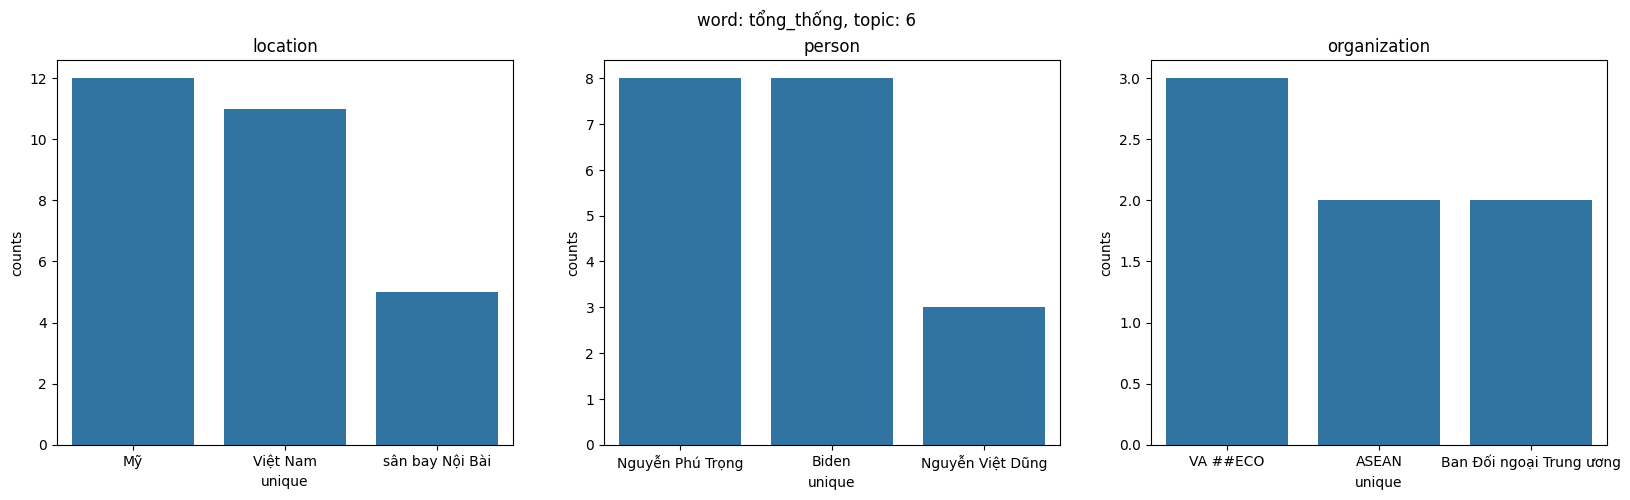

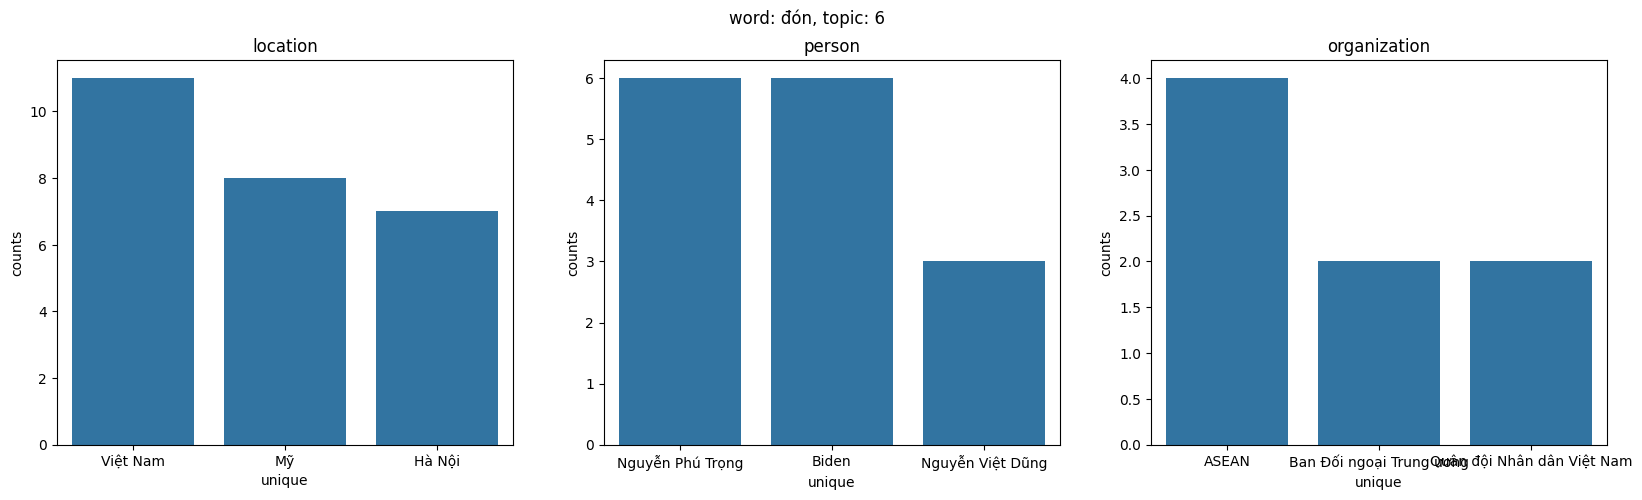

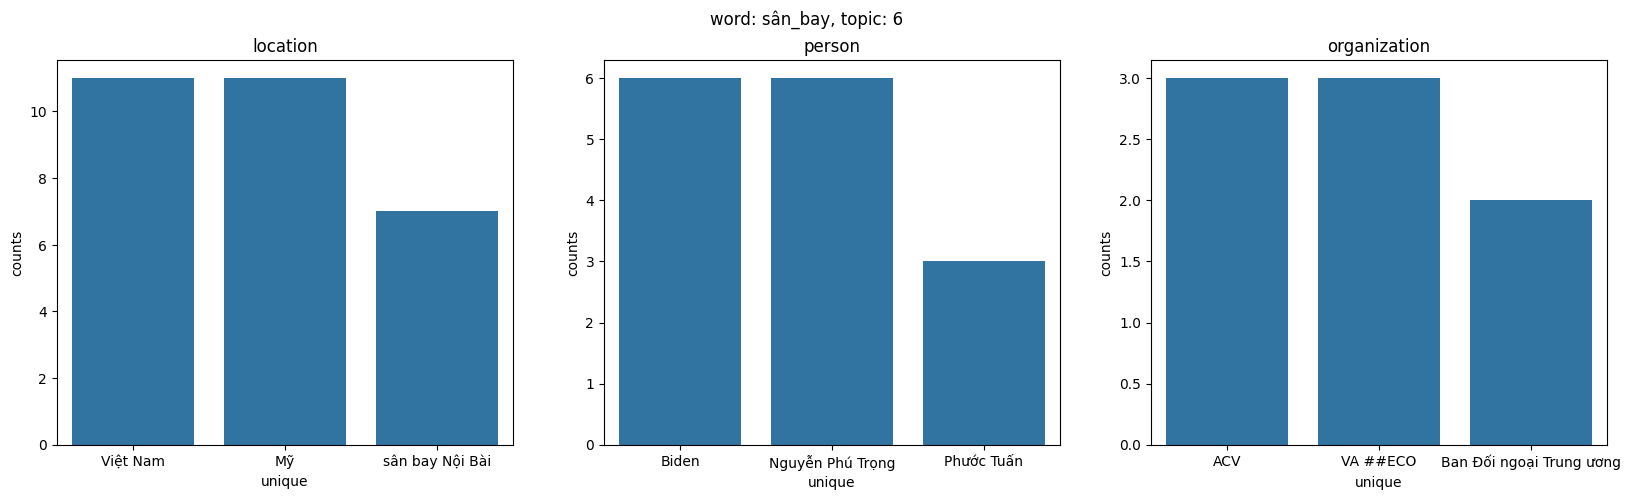

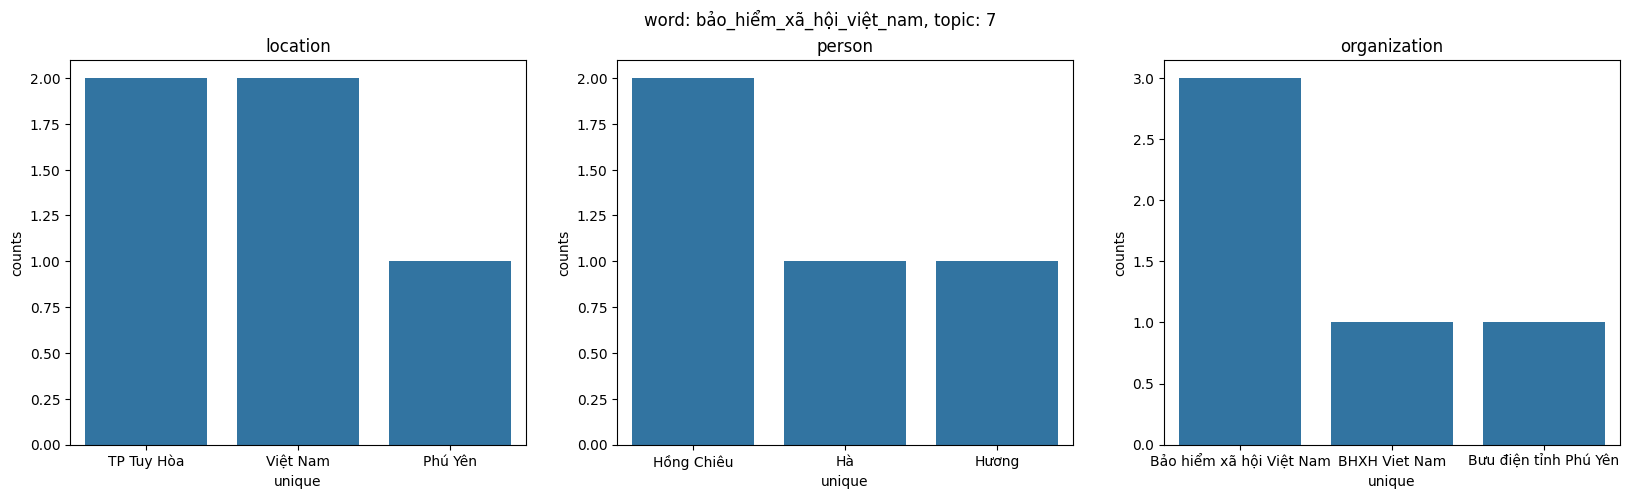

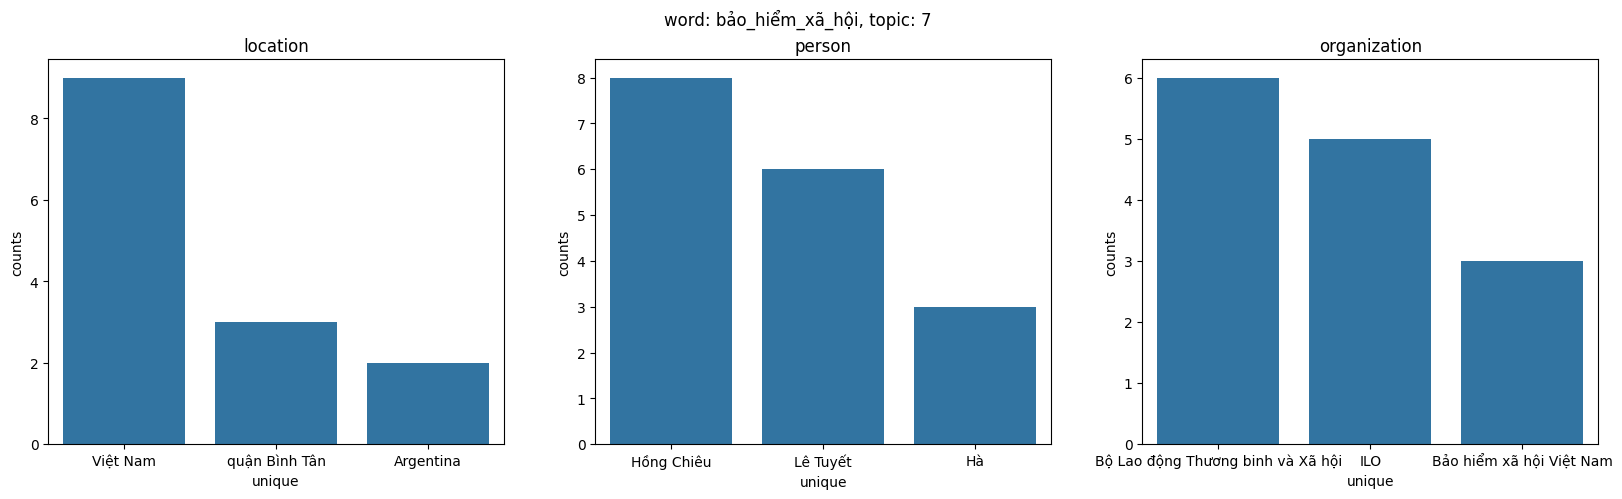

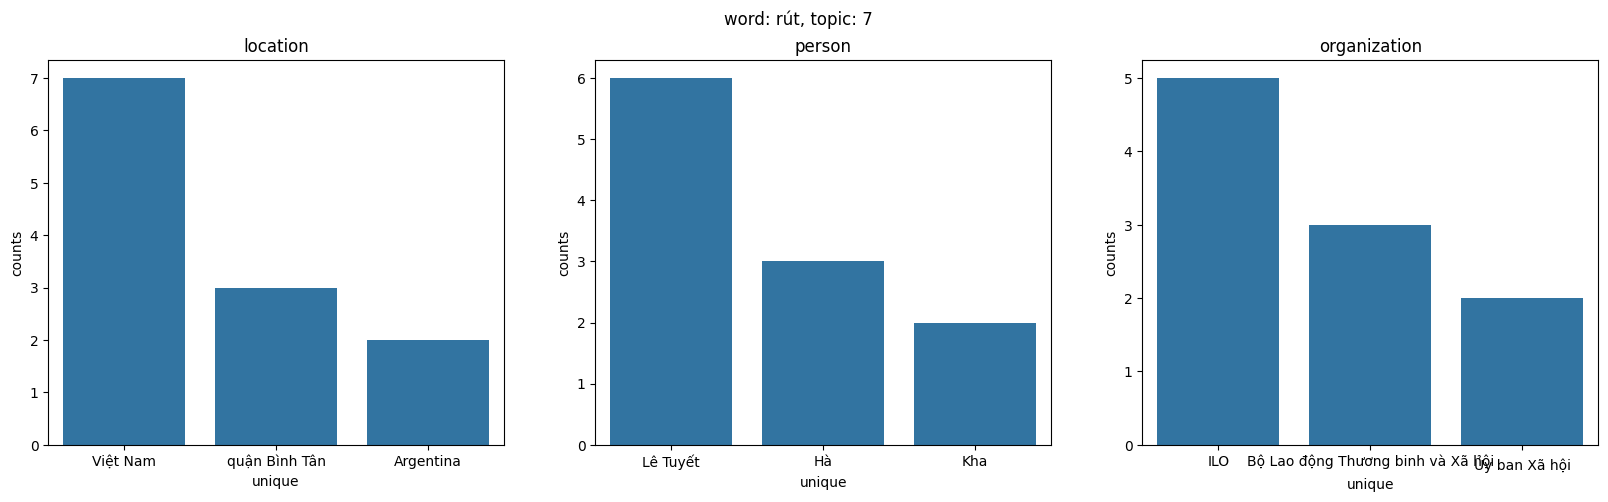

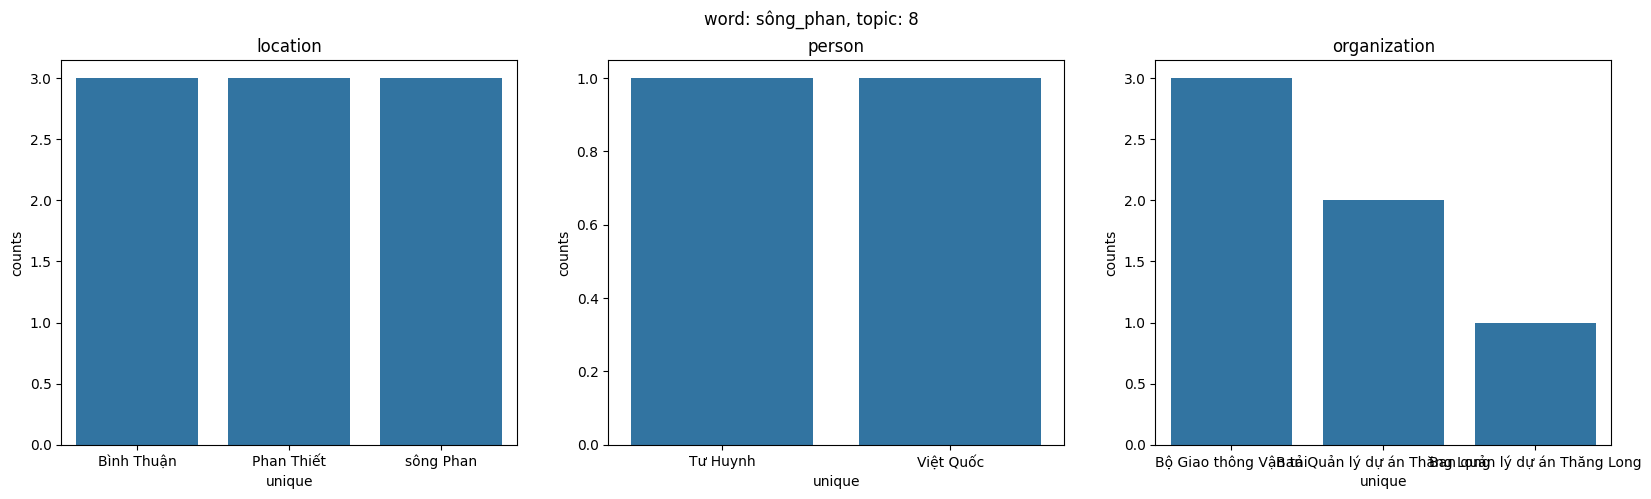

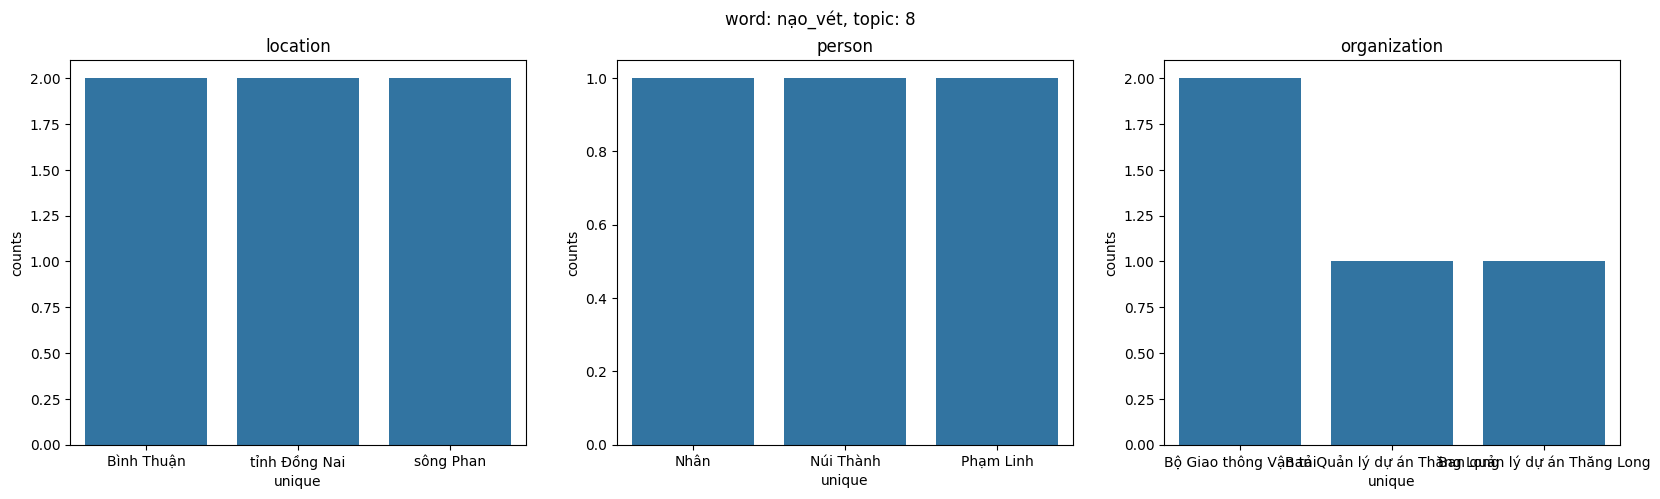

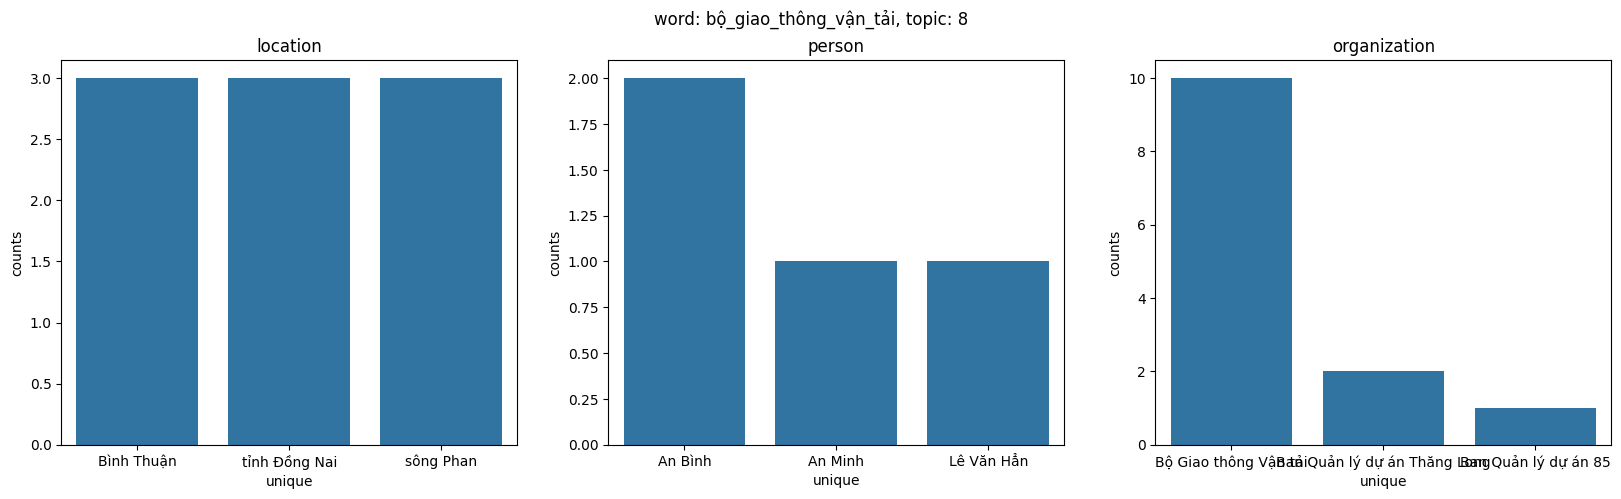

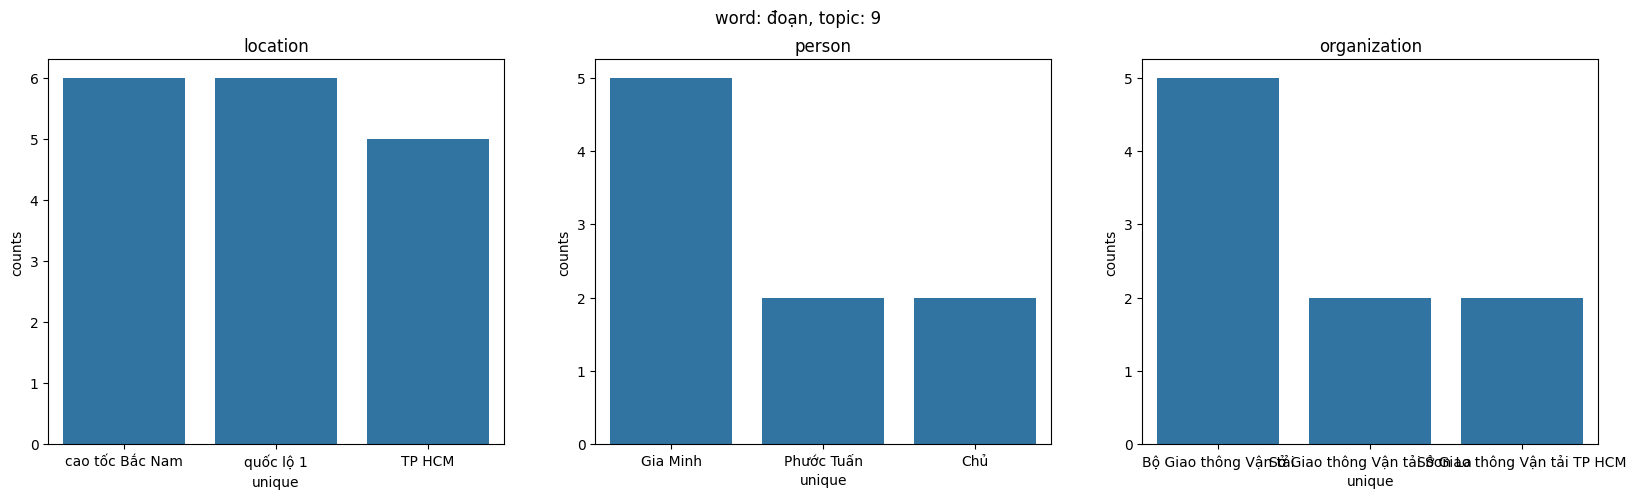

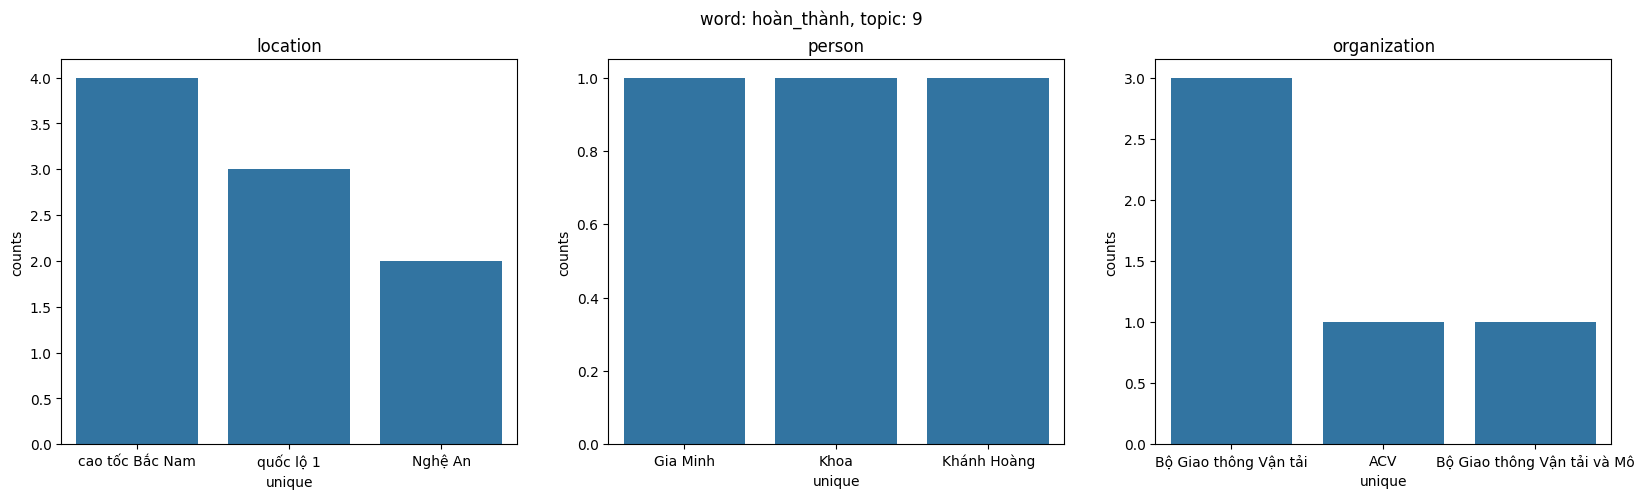

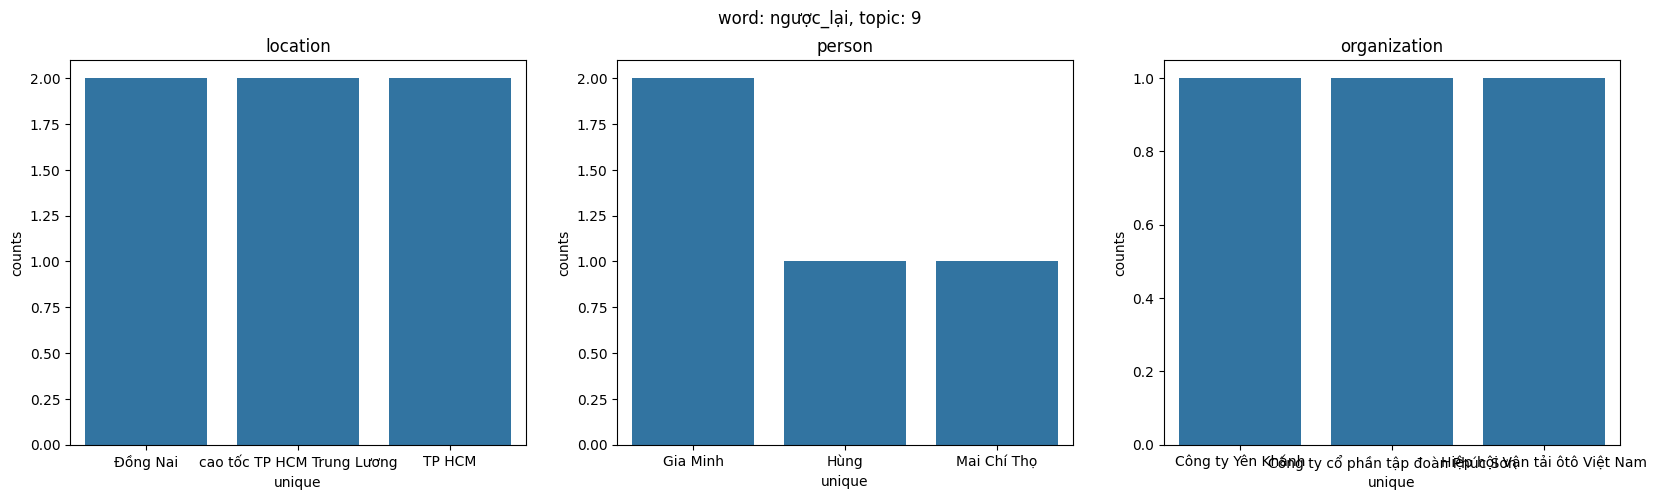

In [31]:
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
t = 0

def get_word_in_time(data, time_start, time_end, topic):
    return data[(data['timestamp'] >= time_start) & (data['timestamp'] <= time_end) & (data['Topic'] == topic)]['Words']

def _get_word(documents,timestamps, nr_bins):
    global_c_tf_idf = normalize(topic_model.c_tf_idf_, axis=1, norm='l1', copy=False)
    all_topics = sorted(list(documents.Topic.unique()))
    all_topics_indices = {topic: index for index, topic in enumerate(all_topics)}
    print(all_topics_indices)
    
    if isinstance(timestamps[0], str):
        infer_datetime_format = True if not datetime_format else False
        documents['timestamp'] = pd.to_datetime(documents['timestamp'], 
                                                infer_datetime_format=infer_datetime_format, 
                                                format=datetime_format)
    
    if nr_bins:
        documents['Bins'] = pd.cut(documents.timestamp, bins=nr_bins)
        documents['timestamp'] = documents.apply(lambda row:row.Bins.left, 1)
        

def getdoc(topic):
    doc = d[d['Topic']==topic]
    return doc

def get_doc_with_timestamp(data,time_start,time_end):
    return data[(data['Timestamp'] >= time_start) & (data['Timestamp'] <= time_end)]

def list_arr_to_arr(arr):
    return [item for sublist in arr for item in sublist]

def unique_count(arr):
    # drop duplicate
    arr = [np.unique(x) for x in arr]
    # list arr to arr
    arr = list_arr_to_arr(arr)
    # count element
    unique, counts = np.unique(arr, return_counts=True)
    df = pd.DataFrame({'unique':unique,'counts':counts})
    df.sort_values(by=['counts'],ascending=False,inplace=True)
    return df

def plot_bar(data,title,word,topic):
    t = len(data)
    fig, ax = plt.subplots(1,t,figsize=(20,5))
    fig.suptitle(f'word: {word}, topic: {topic}')
    for i in range(t):
        sns.barplot(x='unique',y='counts',data=data[i],ax=ax[i])
        ax[i].set_title(title[i])

def find_word_in_doc(word,topic):
    doc_ = getdoc(topic)
    print('sum doc: ',len(doc_))
    doc_word = doc_[doc_['Document'].str.contains(word)]
    print(f'sum doc constains {word}: ',len(doc_word))
    
    arr_location = doc_word['location'].apply(lambda x: ast.literal_eval(x)).to_list()
    df_location = unique_count(arr_location)
    df_location = df_location[0:3]
    # print('--------location--------')
    # print(df_location)
    
    arr_person = doc_word['person'].apply(lambda x: ast.literal_eval(x)).to_list()
    df_person = unique_count(arr_person)
    df_person = df_person[0:3]
    # print('--------person--------')
    # print(df_person)
    
    arr_organization = doc_word['organization'].apply(lambda x: ast.literal_eval(x)).to_list()
    df_organization = unique_count(arr_organization)
    df_organization = df_organization[0:3]
    # print('--------organization--------')
    # print(df_organization)
    # plot
    title = ['location','person','organization']
    data = [df_location,df_person,df_organization]
    plot_bar(data,title,word,topic)
    return doc_word


for i in range(topic_model.nr_topics):
    print('topic: ',i)
    x = topics[i][0:3]
    for word, score in x:
        print(word, score)
        print(len(find_word_in_doc(word,i)))
        print('------------------')

# _get_word(d,timestamp_,10)

In [32]:
topic_distr, topic_token_distr = topic_model.approximate_distribution(docs, calculate_tokens=True)
print('topic_distr: ',len(topic_distr[0])) # n: số lượng chủ đề
print('len of topic_distr: ',len(topic_distr)) # m: số lượng tài liệu hay bài báo
df = topic_model.visualize_approximate_distribution(docs[1], topic_token_distr[1])
df

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.55s/it]


topic_distr:  10
len of topic_distr:  600


In [33]:
print(topics_over_time.shape)
data_topic_over_time = topics_over_time
time_start = "2023-07-28"
time_end = "2023-08-16"
def get_doc_with_timestamp(data,time_start,time_end):
    return data[(data['Timestamp'] >= time_start) & (data['Timestamp'] <= time_end)]
data_topic_over_time = get_doc_with_timestamp(data_topic_over_time,time_start,time_end)
data_topic_over_time.head(20)

(54, 5)


Topic                                              Words  Frequency  \
2       1  iot_việt_nam, mm_iot, viễn_thông, iot_việt, mo...          1   
3       6     thủ_đô_hà_nội, hà_nội, mật_độ, định_hướng, hóa          1   
4       0   nguyễn_tấn_xôn, ôtô_tải, ngược_lại, chở, ôtô_con         16   
5       1  xuất_khẩu, khai_thác, thủy_sản, thu_nhập, phát...         31   
6       2       ga_hà_nội, depot, hoàn_thành, xây, khởi_công          6   
7       3  công_an_quận_ba_đình, trúc_bạch_quận_ba_đình, ...          3   
8       4  sạt_lở, mưa_lũ, lũ, xả, công_ty_cổ_phần_đồng_t...         18   
9       5  cảng_trần_đề, thùy_vân, đồng_bằng_sông_cửu_lon...         16   
10      6  hà_nội, văn_hóa, sân_bay, ủy_ban_thường_vụ_quố...          6   
11      7  bảo_hiểm_xã_hội_việt_nam, bảo_hiểm_xã_hội, tổn...          6   
12      8  sông_phan, bộ_giao_thông_vận_tải, thủy_văn, kh...         10   
13      9  đoạn, cao_tốc_nghi_sơn_diễn_châu, hoàn_thành, ...         12   
14      0  thị_trấn_phú_long, công_an_huyện_hàm_thuận_bắc...          5   
15      1          bộ_chính_trị, bí_thư, ủy, phát_triển, khu         30   
16      2  depot, ga_hà_nội, sông_sài_gòn, metro, bến_bìn...          6   
17      3  chữa_cháy, đốt, cháy, công_an_quận_hải_an, tp_huế          4   
18      4  lặn, vùng_biển, vịnh, trường_thpt_nguyễn_trườn...         11   
19      5                  xây, cải_tạo, sơn_la, dân_cư, khu         15   
20      6     sân_bay, hà_nội, vietnam_airlines, nhà_ga, đón          7   
21      7  bảo_hiểm_xã_hội_việt_nam, bảo_hiểm_xã_hội, bảo...          9   

             Timestamp                                         Name  
2  2023-07-28 09:36:00  1_xúc_phạm_công_ty_cổ_phần_đại_nam_ca_sĩ...  
3  2023-07-28 09:36:00          6_tổng_thống_đón_sân_bay_quốc_phòng  
4  2023-08-06 12:00:00               0_ôtô_tải_ngược_lại_chở_tài_xế  
5  2023-08-06 12:00:00  1_xúc_phạm_công_ty_cổ_phần_đại_nam_ca_sĩ...  
6  2023-08-06 12:00:00          2_ga_hà_nội_depot_nhà_ga_hoàn_thành  
7  2023-08-06 12:00:00         3_chung_cư_khương_đình_chữa_cháy_xây  
8  2023-08-06 12:00:00                    4_cá_sấu_lũ_mưa_lũ_sạt_lở  
9  2023-08-06 12:00:00            5_hoàn_thành_rộng_cải_tạo_trần_đề  
10 2023-08-06 12:00:00          6_tổng_thống_đón_sân_bay_quốc_phòng  
11 2023-08-06 12:00:00  7_bảo_hiểm_xã_hội_việt_nam_bảo_hiểm_xã_h...  
12 2023-08-06 12:00:00  8_sông_phan_nạo_vét_bộ_giao_thông_vận_tả...  
13 2023-08-06 12:00:00              9_đoạn_hoàn_thành_ngược_lại_làn  
14 2023-08-15 14:24:00               0_ôtô_tải_ngược_lại_chở_tài_xế  
15 2023-08-15 14:24:00  1_xúc_phạm_công_ty_cổ_phần_đại_nam_ca_sĩ...  
16 2023-08-15 14:24:00          2_ga_hà_nội_depot_nhà_ga_hoàn_thành  
17 2023-08-15 14:24:00         3_chung_cư_khương_đình_chữa_cháy_xây  
18 2023-08-15 14:24:00                    4_cá_sấu_lũ_mưa_lũ_sạt_lở  
19 2023-08-15 14:24:00            5_hoàn_thành_rộng_cải_tạo_trần_đề  
20 2023-08-15 14:24:00          6_tổng_thống_đón_sân_bay_quốc_phòng  
21 2023-08-15 14:24:00  7_bảo_hiểm_xã_hội_việt_nam_bảo_hiểm_xã_h...

In [34]:
import datetime
time = datetime.datetime.now()
topic_model.save(f"./models/model-{time}.pickle",serialization="pickle")

In [35]:
print(time)

2023-11-22 16:15:42.469136


In [ ]:
papers.to_csv('./data_test/data.csv',index=False)

In [ ]:
import pickle
def save_pickle(list_data, path):
    with open(path, 'wb') as f:
        pickle.dump(list_data, f)
        
def load_pickle_list(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

save_pickle(docs,'./models/data/docs.pkl')
save_pickle(timestamp_,'./models/data/timestamp.pkl')
save_pickle(classes,'./models/data/classes.pkl')